In [1]:
print("Safy")

Safy


In [2]:
# ============================
# GOOGLE COLAB GPU CHECK (ONE CELL)
# ============================

# 1. System-level GPU check
print("=== NVIDIA-SMI ===")
!nvidia-smi

# 2. PyTorch GPU check
print("\n=== PYTORCH CHECK ===")
import torch

print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("Total VRAM (GB):", round(torch.cuda.get_device_properties(0).total_memory / 1e9, 2))
else:
    print("No GPU detected by PyTorch")

# 3. TensorFlow GPU check
print("\n=== TENSORFLOW CHECK ===")
import tensorflow as tf

print("TensorFlow Version:", tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
print("GPUs Detected:", gpus if gpus else "No GPU detected by TensorFlow")

# 4. Quick GPU computation test (PyTorch)
if torch.cuda.is_available():
    print("\n=== GPU COMPUTE TEST ===")
    a = torch.randn((4000, 4000), device="cuda")
    b = torch.randn((4000, 4000), device="cuda")
    c = torch.matmul(a, b)
    torch.cuda.synchronize()
    print("GPU computation successful ✅")
else:
    print("\nGPU computation test skipped ❌")
# ============================
# GOOGLE COLAB GPU CHECK (ONE CELL)
# ============================

# 1. System-level GPU check
print("=== NVIDIA-SMI ===")
!nvidia-smi

# 2. PyTorch GPU check
print("\n=== PYTORCH CHECK ===")
import torch

print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("Total VRAM (GB):", round(torch.cuda.get_device_properties(0).total_memory / 1e9, 2))
else:
    print("No GPU detected by PyTorch")

# 3. TensorFlow GPU check
print("\n=== TENSORFLOW CHECK ===")
import tensorflow as tf

print("TensorFlow Version:", tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
print("GPUs Detected:", gpus if gpus else "No GPU detected by TensorFlow")

# 4. Quick GPU computation test (PyTorch)
if torch.cuda.is_available():
    print("\n=== GPU COMPUTE TEST ===")
    a = torch.randn((4000, 4000), device="cuda")
    b = torch.randn((4000, 4000), device="cuda")
    c = torch.matmul(a, b)
    torch.cuda.synchronize()
    print("GPU computation successful ✅")
else:
    print("\nGPU computation test skipped ❌")


=== NVIDIA-SMI ===
Mon Jan  5 16:47:59 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+----------------------------

In [3]:
# ============================
# LOAD & EXTRACT DATASET IN COLAB
# ============================

import os
import zipfile

ZIP_PATH = "/content/Data.zip"
EXTRACT_PATH = "/content/Data"

# Check if zip exists
if not os.path.exists(ZIP_PATH):
    raise FileNotFoundError(f"{ZIP_PATH} not found")

# Create extract directory
os.makedirs(EXTRACT_PATH, exist_ok=True)

# Extract zip
with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_PATH)

print("✅ Dataset extracted successfully")
print("📂 Extracted to:", EXTRACT_PATH)

# Show directory structure
for root, dirs, files in os.walk(EXTRACT_PATH):
    level = root.replace(EXTRACT_PATH, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    for f in files[:5]:  # limit output
        print(f"{indent}    {f}")


✅ Dataset extracted successfully
📂 Extracted to: /content/Data
Data/
    Data/
        data.yaml
        image/
            val/
                7c81f8fe-PXL_20250430_103921639.jpg
                6a1b0ee6-PXL_20250430_104242705.jpg
                6f6e6ed7-PXL_20250430_103924292.jpg
                22ba4159-PXL_20250430_104237731.jpg
                6f8a3572-PXL_20250430_104229911.jpg
            test/
                0b85e75f-PXL_20250430_104154656.jpg
                2b80df50-PXL_20250430_104146323.jpg
                1b26a9e6-PXL_20250430_104045951.jpg
                3e36c89c-PXL_20250430_104016941.jpg
                1f29e2d2-PXL_20250430_103937381.jpg
            train/
                20463c76-PXL_20250430_104035723.jpg
                414b16a2-PXL_20250430_103930494.jpg
                294a649b-PXL_20250430_103915809.jpg
                c96f614a-PXL_20250430_103918758.jpg
                e4690cb3-PXL_20250430_104020866.jpg
        labels/
            val/
                22ba4

In [4]:
!pip install -U ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.0 MB/s eta 0:00:00


In [5]:
import os

img_dir = "/content/Data/Data/image"
lbl_dir = "/content/Data/Data/labels"

splits = ["train", "val", "test"]

for split in splits:
    imgs = sorted(os.listdir(f"{img_dir}/{split}"))
    lbls = sorted(os.listdir(f"{lbl_dir}/{split}"))
    print(f"{split.upper()} → Images: {len(imgs)}, Labels: {len(lbls)}")


TRAIN → Images: 29, Labels: 29
VAL → Images: 8, Labels: 8
TEST → Images: 8, Labels: 8


In [6]:
AUGMENTATION = dict(
    hsv_h=0.02,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=20,
    translate=0.2,
    scale=0.5,
    shear=10,
    perspective=0.001,
    flipud=0.5,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.3,
    copy_paste=0.3
)


In [21]:
from sklearn.model_selection import KFold
from ultralytics import YOLO
import shutil
import yaml
import glob
import os

# Ensure kfold_results.csv is cleared before starting new training to prevent appending issues
csv_path = "/content/kfold_results.csv"
if os.path.exists(csv_path):
    os.remove(csv_path)
    print(f"Cleared existing {csv_path}")

BASE_PATH = "/content/Data/Data"
IMG_TRAIN = f"{BASE_PATH}/image/train"
LBL_TRAIN = f"{BASE_PATH}/labels/train"

images = sorted(glob.glob(f"{IMG_TRAIN}/*.jpg"))
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kfold.split(images)):
    print(f"\n========== FOLD {fold+1} ==========")

    fold_dir = f"/content/fold_{fold}"
    os.makedirs(fold_dir, exist_ok=True)

    for s in ["train", "val"]:
        os.makedirs(f"{fold_dir}/images/{s}", exist_ok=True)
        os.makedirs(f"{fold_dir}/labels/{s}", exist_ok=True)

    # Copy data
    for idx in train_idx:
        img = images[idx]
        lbl = img.replace("image", "labels").replace(".jpg", ".txt")
        shutil.copy(img, f"{fold_dir}/images/train/")
        shutil.copy(lbl, f"{fold_dir}/labels/train/")

    for idx in val_idx:
        img = images[idx]
        lbl = img.replace("image", "labels").replace(".jpg", ".txt")
        shutil.copy(img, f"{fold_dir}/images/val/")
        shutil.copy(lbl, f"{fold_dir}/labels/val/")

    # Generate fold YAML
    with open(f"{BASE_PATH}/data.yaml") as f:
        loaded_content = yaml.safe_load(f)

    if isinstance(loaded_content, dict):
        data_yaml = loaded_content
    else:
        # If the content is not a dictionary, assume it was a class name or malformed.
        # Create a new dictionary and populate with essential YOLO config.
        data_yaml = {
            'names': [str(loaded_content)] if loaded_content else ['unknown_class'],
            'nc': 1 # Assuming one class if the loaded_content was a single string for a class name.
        }

    data_yaml["train"] = f"{fold_dir}/images/train"
    data_yaml["val"] = f"{fold_dir}/images/val"

    yaml_path = f"{fold_dir}/data.yaml"
    with open(yaml_path, "w") as f:
        yaml.safe_dump(data_yaml, f)

    # Train YOLOv11
    model = YOLO("yolo11n.pt")  # nano model ideal for small data

    model.train(
        data=yaml_path,
        epochs=150,
        imgsz=640,
        batch=4,
        patience=50,
        optimizer="AdamW",
        lr0=1e-3,
        lrf=1e-5,
        weight_decay=0.0005,
        cos_lr=True,
        device=0,
        name=f"YOLOv11_Fold{fold+1}",
        **AUGMENTATION
    )

    # After training for each fold, validate and save results
    from ultralytics.utils.metrics import ConfusionMatrix
    import pandas as pd

    metrics = model.val(
        data=yaml_path,
        imgsz=640,
        split="val",
        save_json=True,
        save_conf=True,
        plots=False # Set plots to False to avoid generating plots for each fold during training
    )

    results = {
        "fold": fold + 1,
        "precision": metrics.box.mp,
        "recall": metrics.box.mr,
        "map50": metrics.box.map50,
        "map50_95": metrics.box.map
    }

    df_results = pd.DataFrame([results])

    if os.path.exists(csv_path):
        df_results.to_csv(csv_path, mode="a", header=False, index=False)
    else:
        df_results.to_csv(csv_path, index=False)

    print(f"Results for Fold {fold+1} appended to {csv_path}")

Cleared existing /content/kfold_results.csv

========== FOLD 1 ==========
Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.3, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/fold_0/data.yaml, degrees=20, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.02, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=1e-05, mask_ratio=4, max_det=300, mixup=0.3, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=YOLOv11_Fold12, nbs=64, nms=False, opset=None, optimize=False, optimize

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1192.7±1785.8 MB/s, size: 1333.7 KB)
val: Scanning /content/fold_0/labels/val.cache... 6 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 6/6 1.0Kit/s 0.0s
Plotting labels to /content/runs/detect/YOLOv11_Fold12/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/detect/YOLOv11_Fold12
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      1/150      1.04G      2.041      2.703      2.342         16        640: 0% ──────────── 0/6  0.6s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      1/150      1.06G      1.996      2.859      2.363          9        640: 100% ━━━━━━━━━━━━ 6/6 2.0it/s 3.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 3.1it/s 0.3s
                   all          6          6    0.00333          1      0.115     0.0532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      2/150      1.06G      2.386      2.813       2.85         16        640: 0% ──────────── 0/6  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      2/150      1.06G      2.032      2.669      2.352          9        640: 100% ━━━━━━━━━━━━ 6/6 2.4it/s 2.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.3it/s 0.2s
                   all          6          6    0.00333          1      0.305      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      3/150      1.06G      1.933      2.562      2.496         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      3/150      1.06G      1.855      2.574      2.277         14        640: 100% ━━━━━━━━━━━━ 6/6 5.5it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.1it/s 0.1s
                   all          6          6    0.00167        0.5      0.123     0.0136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      4/150      1.06G      2.244      2.386      2.443         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      4/150      1.06G      1.683      2.203      2.032         12        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 17.4it/s 0.1s
                   all          6          6    0.00992          1       0.45      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      5/150      1.06G      1.643      1.966       1.95         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      5/150      1.06G      1.572      2.041      1.943         15        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.9it/s 0.1s
                   all          6          6    0.00863          1      0.398       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      6/150      1.06G      1.309      1.866      1.825         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      6/150      1.06G      1.546      1.949      1.883         10        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 17.3it/s 0.1s
                   all          6          6    0.00875          1      0.671      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      7/150      1.06G      1.543       1.79      1.781         15        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      7/150      1.06G       1.53      1.833      1.766         12        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.1it/s 0.1s
                   all          6          6    0.00927          1      0.633      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      8/150      1.06G      1.525      1.774      1.681         17        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      8/150      1.06G      1.484      1.761      1.727         10        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.8it/s 0.1s
                   all          6          6    0.00927          1      0.633      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      9/150      1.06G      1.488      1.843      1.934         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      9/150      1.06G      1.473      1.592      1.768         17        640: 100% ━━━━━━━━━━━━ 6/6 4.8it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.2it/s 0.1s
                   all          6          6      0.136          1      0.995      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     10/150      1.06G      1.328      1.482      1.687         17        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     10/150      1.06G      1.447      1.572      1.646         11        640: 100% ━━━━━━━━━━━━ 6/6 7.2it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.7it/s 0.1s
                   all          6          6      0.942          1      0.995      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     11/150      1.06G       1.46      1.858      1.868         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     11/150      1.06G      1.516      1.672      1.839          7        640: 100% ━━━━━━━━━━━━ 6/6 6.1it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.9it/s 0.1s
                   all          6          6      0.942          1      0.995      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     12/150      1.06G      1.247      1.682      1.545          9        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     12/150      1.06G       1.51      1.545      1.764         10        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.9it/s 0.1s
                   all          6          6       0.93      0.833      0.955      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     13/150      1.06G       1.61      1.498       1.73         24        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     13/150      1.06G       1.43      1.449      1.662         13        640: 100% ━━━━━━━━━━━━ 6/6 7.5it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.9it/s 0.1s
                   all          6          6       0.93      0.833      0.955      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     14/150      1.06G      1.428      1.321      1.373         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     14/150      1.06G      1.554      1.455      1.719         12        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.6it/s 0.1s
                   all          6          6       0.93      0.833      0.955      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     15/150      1.06G      1.419       1.51      1.637         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     15/150      1.06G      1.522      1.494      1.706          6        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.6it/s 0.1s
                   all          6          6       0.51      0.695      0.797      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     16/150      1.06G       1.35      1.455      1.653         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     16/150      1.06G      1.449      1.506       1.71          9        640: 100% ━━━━━━━━━━━━ 6/6 5.8it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.6it/s 0.1s
                   all          6          6       0.51      0.695      0.797      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     17/150      1.06G      1.395      1.258      1.582         20        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     17/150      1.06G      1.507      1.576       1.75         13        640: 100% ━━━━━━━━━━━━ 6/6 4.2it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.6it/s 0.1s
                   all          6          6      0.988          1      0.995       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     18/150      1.06G      1.348      1.243      1.624         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     18/150      1.06G      1.501      1.487      1.811         10        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.4it/s 0.1s
                   all          6          6      0.988          1      0.995       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     19/150      1.06G      1.284        1.5      1.488         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     19/150      1.06G      1.461      1.408      1.698          8        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.3it/s 0.1s
                   all          6          6      0.988          1      0.995       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     20/150      1.06G      1.507      1.453      1.696         26        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     20/150      1.06G      1.502      1.481      1.709         11        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.4it/s 0.1s
                   all          6          6       0.99          1      0.995      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     21/150      1.06G       1.81      1.637      1.932         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     21/150      1.06G      1.529      1.612       1.74          8        640: 100% ━━━━━━━━━━━━ 6/6 7.2it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.9it/s 0.1s
                   all          6          6       0.99          1      0.995      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     22/150      1.06G      1.564      1.339      1.931         13        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     22/150      1.06G      1.629      1.488      1.818         11        640: 100% ━━━━━━━━━━━━ 6/6 7.7it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.0it/s 0.1s
                   all          6          6       0.99          1      0.995      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     23/150      1.06G      1.791      1.665      2.088         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     23/150      1.06G       1.54      1.592      1.847          8        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.8it/s 0.1s
                   all          6          6      0.987          1      0.995      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     24/150      1.06G       1.24      1.291       1.63         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     24/150      1.06G      1.373      1.368      1.615         14        640: 100% ━━━━━━━━━━━━ 6/6 7.1it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 17.2it/s 0.1s
                   all          6          6      0.987          1      0.995      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     25/150      1.06G      1.789      1.543      2.127         14        640: 0% ──────────── 0/6  0.7s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     25/150      1.06G      1.533      1.486      1.769         13        640: 100% ━━━━━━━━━━━━ 6/6 2.4it/s 2.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.0it/s 0.1s
                   all          6          6      0.985          1      0.995      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     26/150      1.06G      1.232      1.208      1.588         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     26/150      1.06G      1.448      1.451      1.742         10        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.9it/s 0.1s
                   all          6          6      0.985          1      0.995      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     27/150      1.06G      1.494      1.412       1.87         23        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     27/150      1.06G      1.312      1.389      1.642          5        640: 100% ━━━━━━━━━━━━ 6/6 5.9it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.0it/s 0.1s
                   all          6          6      0.985          1      0.995      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     28/150      1.06G      1.292      1.492      1.698         11        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     28/150      1.06G      1.502      1.416      1.765         17        640: 100% ━━━━━━━━━━━━ 6/6 7.0it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.9it/s 0.1s
                   all          6          6       0.99          1      0.995      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     29/150      1.06G      1.595       1.49      1.756          9        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.2it/s 0.1s
                   all          6          6       0.99          1      0.995      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     30/150      1.06G      1.392      1.252      1.547         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     30/150      1.06G       1.34      1.302      1.681          6        640: 100% ━━━━━━━━━━━━ 6/6 7.0it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.8it/s 0.1s
                   all          6          6       0.99          1      0.995      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     31/150      1.06G      1.627      1.537       1.88         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     31/150      1.06G      1.454      1.339      1.643         14        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.4it/s 0.1s
                   all          6          6      0.991          1      0.995      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     32/150      1.06G      1.586      1.391      2.099         10        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     32/150      1.06G      1.505      1.421      1.811         12        640: 100% ━━━━━━━━━━━━ 6/6 4.6it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.6it/s 0.1s
                   all          6          6      0.991          1      0.995      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     33/150      1.06G      1.608      1.568      1.839         14        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     33/150      1.06G       1.49      1.349      1.652         13        640: 100% ━━━━━━━━━━━━ 6/6 4.8it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.5it/s 0.1s
                   all          6          6      0.991          1      0.995      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     34/150      1.06G      1.381      1.332      1.647         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     34/150      1.06G      1.517      1.524       1.68         23        640: 100% ━━━━━━━━━━━━ 6/6 7.0it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.9it/s 0.1s
                   all          6          6      0.991          1      0.995      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     35/150      1.06G      1.014      1.246      1.291         10        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     35/150      1.06G      1.356      1.373      1.689          9        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.1it/s 0.1s
                   all          6          6      0.991          1      0.995      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     36/150      1.06G      1.512      1.364      1.558         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     36/150      1.06G      1.577      1.364       1.76         14        640: 100% ━━━━━━━━━━━━ 6/6 7.2it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.4it/s 0.1s
                   all          6          6      0.981          1      0.995      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     37/150      1.06G      1.549      1.463       1.94         17        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     37/150      1.06G      1.501      1.342      1.664         14        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.6it/s 0.1s
                   all          6          6      0.981          1      0.995      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     38/150      1.06G      1.615      1.201      1.833         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     38/150      1.06G      1.337      1.265      1.677         10        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.5it/s 0.1s
                   all          6          6      0.981          1      0.995      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     39/150      1.06G      1.398      1.194      1.452          9        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     39/150      1.06G      1.476      1.292      1.638         14        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.9it/s 0.1s
                   all          6          6      0.987          1      0.995      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     40/150      1.06G      1.646      1.373      1.839         24        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     40/150      1.06G      1.437      1.293      1.692          8        640: 100% ━━━━━━━━━━━━ 6/6 5.7it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 17.2it/s 0.1s
                   all          6          6      0.987          1      0.995      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     41/150      1.06G      1.214       1.29      1.792         11        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     41/150      1.06G      1.474      1.405      1.793          4        640: 100% ━━━━━━━━━━━━ 6/6 3.7it/s 1.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.2it/s 0.1s
                   all          6          6      0.968          1      0.995      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     42/150      1.06G      1.234      1.152      1.559         18        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     42/150      1.06G      1.279      1.196      1.588         13        640: 100% ━━━━━━━━━━━━ 6/6 7.4it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.0it/s 0.1s
                   all          6          6      0.968          1      0.995      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     43/150      1.06G      1.221      1.133      1.528         14        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     43/150      1.06G      1.413      1.336      1.667          8        640: 100% ━━━━━━━━━━━━ 6/6 7.6it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 17.1it/s 0.1s
                   all          6          6      0.968          1      0.995      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     44/150      1.06G      1.477      1.359      1.881         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     44/150      1.06G      1.406      1.242      1.624         13        640: 100% ━━━━━━━━━━━━ 6/6 7.0it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.4it/s 0.1s
                   all          6          6      0.981          1      0.995      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     45/150      1.06G      1.547      1.464      1.911         12        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     45/150      1.06G      1.452        1.3      1.678         17        640: 100% ━━━━━━━━━━━━ 6/6 7.2it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.2it/s 0.1s
                   all          6          6      0.981          1      0.995      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     46/150      1.06G      1.348      1.226      1.624         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     46/150      1.06G      1.358      1.195      1.639         13        640: 100% ━━━━━━━━━━━━ 6/6 7.0it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.9it/s 0.1s
                   all          6          6      0.981          1      0.995      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     47/150      1.06G      1.151      1.336      1.766         11        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     47/150      1.06G      1.456      1.486      1.806         13        640: 100% ━━━━━━━━━━━━ 6/6 3.4it/s 1.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.4it/s 0.1s
                   all          6          6      0.847          1      0.972      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     48/150      1.06G      1.491      1.277      1.783         16        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     48/150      1.06G      1.386      1.236      1.728         17        640: 100% ━━━━━━━━━━━━ 6/6 5.3it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.5it/s 0.1s
                   all          6          6      0.847          1      0.972      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     49/150      1.06G      1.226      1.329      1.597         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     49/150      1.06G      1.269      1.184      1.533         12        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.0it/s 0.1s
                   all          6          6      0.983          1      0.995      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     50/150      1.06G       1.27      1.314      1.643          8        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.9it/s 0.1s
                   all          6          6      0.983          1      0.995      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     51/150      1.06G      1.302      1.321      1.565         17        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     51/150      1.06G      1.463      1.278      1.717         10        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.9it/s 0.1s
                   all          6          6      0.983          1      0.995      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     52/150      1.06G      1.197      1.146      1.352         16        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     52/150      1.06G      1.311      1.238      1.576         12        640: 100% ━━━━━━━━━━━━ 6/6 7.0it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.7it/s 0.1s
                   all          6          6      0.987          1      0.995      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     53/150      1.06G      1.342      1.171      1.702         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     53/150      1.06G      1.464      1.281      1.708         13        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.5it/s 0.1s
                   all          6          6      0.987          1      0.995      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     54/150      1.06G      1.255      1.042      1.524         18        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     54/150      1.06G      1.288      1.166       1.58          9        640: 100% ━━━━━━━━━━━━ 6/6 7.1it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.1it/s 0.1s
                   all          6          6      0.987          1      0.995      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     55/150      1.06G      1.529      1.049      1.432         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     55/150      1.06G      1.381      1.248       1.57         14        640: 100% ━━━━━━━━━━━━ 6/6 4.4it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.8it/s 0.1s
                   all          6          6      0.987          1      0.995      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     56/150      1.06G      1.247      1.324      1.532         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     56/150      1.06G      1.439      1.276      1.647         15        640: 100% ━━━━━━━━━━━━ 6/6 5.2it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.4it/s 0.1s
                   all          6          6      0.987          1      0.995      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     57/150      1.06G      1.432      1.131       1.69         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     57/150      1.06G      1.273      1.326      1.604          9        640: 100% ━━━━━━━━━━━━ 6/6 5.8it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.6it/s 0.1s
                   all          6          6      0.988          1      0.995       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     58/150      1.06G      1.348       1.24      1.703         20        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     58/150      1.06G      1.425      1.238      1.696         13        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.2it/s 0.1s
                   all          6          6      0.988          1      0.995       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     59/150      1.06G      1.308       1.13      1.566         19        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     59/150      1.06G      1.288      1.186      1.543         14        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.2it/s 0.1s
                   all          6          6      0.988          1      0.995       0.53
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 9, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

59 epochs completed in 0.029 hours.
Optimizer stripped from /content/runs/detect/YOLOv11_Fold12/weights/last.pt, 5.5MB
Optimizer stripped from /content/runs/detect/YOLOv11_Fold12/weights/best.pt, 5.5MB

Validating /content/runs/detect/YOLOv11_Fold12/weights/best.pt...
Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1991.3±1621.7 MB/s, size: 1323.8 KB)
val: Scanning /content/fold_1/labels/val.cache... 6 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 6/6 3.4Kit/s 0.0s
Plotting labels to /content/runs/detect/YOLOv11_Fold22/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/detect/YOLOv11_Fold22
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      1/150     0.859G      2.369      2.674       2.59         16        640: 0% ──────────── 0/6  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      1/150     0.879G      2.125      2.882      2.424          8        640: 100% ━━━━━━━━━━━━ 6/6 1.9it/s 3.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.5it/s 0.2s
                   all          6          6    0.00278      0.833     0.0741     0.0506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      2/150     0.879G       2.47      2.846      2.732         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      2/150     0.879G      2.054      2.695      2.331          7        640: 100% ━━━━━━━━━━━━ 6/6 4.4it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.9it/s 0.1s
                   all          6          6    0.00333          1      0.283     0.0481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      3/150     0.879G      1.833      2.342      2.216         10        640: 100% ━━━━━━━━━━━━ 6/6 4.0it/s 1.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.8it/s 0.1s
                   all          6          6          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      4/150     0.879G      2.297      2.548      2.416         17        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      4/150     0.879G      1.911      2.158       2.11         13        640: 100% ━━━━━━━━━━━━ 6/6 4.6it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 17.3it/s 0.1s
                   all          6          6          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      5/150     0.879G      1.443      2.023      1.801         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      5/150     0.879G      1.808      2.053      2.034         16        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.0it/s 0.1s
                   all          6          6    0.00407      0.333     0.0129     0.0045

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      6/150     0.879G      1.739      1.943       2.09         12        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      6/150     0.879G      1.826      2.025      2.041         11        640: 100% ━━━━━━━━━━━━ 6/6 7.4it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 17.1it/s 0.1s
                   all          6          6     0.0109          1      0.434      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      7/150     0.879G      1.695      1.808      1.864         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      7/150     0.879G      1.739      1.991      1.882         12        640: 100% ━━━━━━━━━━━━ 6/6 6.1it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.6it/s 0.1s
                   all          6          6    0.00955          1      0.469      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      8/150     0.879G      1.596      1.932      1.802         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      8/150     0.879G      1.595        1.8       1.78         10        640: 100% ━━━━━━━━━━━━ 6/6 7.4it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.7it/s 0.1s
                   all          6          6    0.00955          1      0.469      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      9/150     0.879G      1.417      1.635      1.899         17        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      9/150     0.879G      1.575      1.691      1.799         17        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.9it/s 0.1s
                   all          6          6      0.698      0.333      0.517      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     10/150     0.879G      1.712      1.769      1.761         21        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     10/150     0.879G      1.528       1.69      1.679          8        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.8it/s 0.1s
                   all          6          6      0.594      0.333      0.542      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     11/150     0.879G      1.448      1.565      1.769         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     11/150     0.879G      1.422      1.586      1.758          6        640: 100% ━━━━━━━━━━━━ 6/6 5.3it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.8it/s 0.1s
                   all          6          6      0.594      0.333      0.542      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     12/150     0.879G      1.717      1.763       1.91         12        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     12/150     0.879G      1.519      1.613      1.819          9        640: 100% ━━━━━━━━━━━━ 6/6 4.1it/s 1.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.5it/s 0.1s
                   all          6          6          1       0.78      0.995      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     13/150     0.879G      2.036      1.805      1.952         29        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     13/150     0.881G       1.58      1.563       1.77         13        640: 100% ━━━━━━━━━━━━ 6/6 7.8it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 17.3it/s 0.1s
                   all          6          6          1       0.78      0.995      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     14/150     0.896G      1.613      1.538      1.575         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     14/150     0.896G      1.496       1.53      1.734         15        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.8it/s 0.1s
                   all          6          6          1       0.78      0.995      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     15/150     0.896G      1.452      1.644      1.741         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     15/150     0.896G      1.465      1.572      1.632          8        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 17.4it/s 0.1s
                   all          6          6      0.954          1      0.995      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     16/150      0.91G      1.549      1.435      1.873         13        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     16/150     0.912G      1.517      1.501      1.721         10        640: 100% ━━━━━━━━━━━━ 6/6 5.6it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.6it/s 0.1s
                   all          6          6      0.954          1      0.995      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     17/150     0.912G      1.511      1.352      1.665         18        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     17/150     0.912G      1.384      1.422      1.622         14        640: 100% ━━━━━━━━━━━━ 6/6 7.2it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.8it/s 0.1s
                   all          6          6       0.73          1      0.872      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     18/150     0.912G      1.508      1.347      1.686         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     18/150     0.912G       1.59      1.623      1.848          7        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.0it/s 0.1s
                   all          6          6       0.73          1      0.872      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     19/150     0.912G      1.366      1.405      1.705         10        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     19/150     0.912G      1.394      1.399      1.681          8        640: 100% ━━━━━━━━━━━━ 6/6 4.2it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.9it/s 0.2s
                   all          6          6       0.73          1      0.872      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     20/150     0.912G      1.559      1.229      1.749         17        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     20/150     0.912G      1.582      1.468      1.791         13        640: 100% ━━━━━━━━━━━━ 6/6 5.3it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.6it/s 0.1s
                   all          6          6      0.695          1      0.879      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     21/150     0.912G      1.479      1.776      1.668         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     21/150     0.912G      1.551      1.723      1.794         11        640: 100% ━━━━━━━━━━━━ 6/6 7.1it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.4it/s 0.1s
                   all          6          6      0.695          1      0.879      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     22/150     0.912G      1.648      1.415      1.908         10        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     22/150     0.912G      1.575      1.606      1.808          6        640: 100% ━━━━━━━━━━━━ 6/6 7.4it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.0it/s 0.1s
                   all          6          6      0.695          1      0.879      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     23/150     0.912G      1.735      1.514      2.073         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     23/150     0.912G      1.492      1.524      1.806          9        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.1it/s 0.1s
                   all          6          6      0.852      0.967      0.948      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     24/150     0.912G      1.303      1.346      1.713         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     24/150     0.912G      1.418      1.375      1.703         14        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.1it/s 0.1s
                   all          6          6      0.852      0.967      0.948      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     25/150     0.912G      1.467       1.43      1.817         11        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     25/150     0.912G      1.656      1.675      1.844         13        640: 100% ━━━━━━━━━━━━ 6/6 4.5it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.1it/s 0.1s
                   all          6          6      0.853      0.833      0.972      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     26/150     0.912G      1.152      1.159      1.535         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     26/150     0.912G      1.328       1.38      1.651          9        640: 100% ━━━━━━━━━━━━ 6/6 5.7it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.4it/s 0.1s
                   all          6          6      0.853      0.833      0.972      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     27/150     0.912G      1.569      1.352      1.782         21        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     27/150     0.912G      1.364      1.395      1.652          6        640: 100% ━━━━━━━━━━━━ 6/6 3.8it/s 1.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.6it/s 0.2s
                   all          6          6      0.853      0.833      0.972      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     28/150     0.922G       1.28      2.359      1.913          6        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     28/150     0.926G      1.434      1.561      1.776         13        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.8it/s 0.1s
                   all          6          6      0.845          1      0.972      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     29/150     0.926G      1.776      1.518      1.814         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     29/150     0.926G      1.655       1.51      1.797          7        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.7it/s 0.1s
                   all          6          6      0.845          1      0.972      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     30/150     0.926G      1.363      1.419      1.709          5        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.5it/s 0.1s
                   all          6          6      0.845          1      0.972      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     31/150     0.941G      1.271      1.342      1.766         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     31/150     0.941G      1.436      1.275      1.595         13        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.5it/s 0.1s
                   all          6          6      0.846          1      0.995      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     32/150     0.941G      1.726      1.436      1.958         12        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     32/150     0.941G      1.499      1.402      1.754         12        640: 100% ━━━━━━━━━━━━ 6/6 7.4it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 17.1it/s 0.1s
                   all          6          6      0.846          1      0.995      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     33/150     0.941G      1.564      1.482      1.785         15        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     33/150     0.941G      1.342      1.322      1.549         10        640: 100% ━━━━━━━━━━━━ 6/6 7.4it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.5it/s 0.1s
                   all          6          6      0.987          1      0.995      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     34/150     0.945G      1.496      1.482      1.681         13        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     34/150     0.955G      1.535      1.421      1.656         21        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.7it/s 0.1s
                   all          6          6      0.987          1      0.995      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     35/150     0.971G      1.095      1.141      1.383         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     35/150     0.971G      1.403      1.376      1.678          9        640: 100% ━━━━━━━━━━━━ 6/6 4.0it/s 1.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.6it/s 0.1s
                   all          6          6      0.987          1      0.995      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     36/150     0.971G      1.675      1.634      1.785         17        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     36/150     0.971G      1.482      1.296      1.652         13        640: 100% ━━━━━━━━━━━━ 6/6 8.1it/s 0.7s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.9it/s 0.1s
                   all          6          6      0.973          1      0.995      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     37/150     0.971G       1.42      1.317      1.807         14        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     37/150     0.971G       1.45      1.294      1.636         11        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.5it/s 0.1s
                   all          6          6      0.973          1      0.995      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     38/150     0.971G      1.716      1.386      1.853         10        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     38/150     0.971G      1.535        1.3      1.756         10        640: 100% ━━━━━━━━━━━━ 6/6 7.5it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.8it/s 0.1s
                   all          6          6      0.973          1      0.995      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     39/150     0.971G        1.4      1.405      1.506         12        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     39/150     0.971G       1.53      1.389      1.743         13        640: 100% ━━━━━━━━━━━━ 6/6 7.0it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.5it/s 0.1s
                   all          6          6      0.946          1      0.995      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     40/150     0.971G      1.201      1.173      1.461         17        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     40/150     0.971G      1.271      1.232      1.508          7        640: 100% ━━━━━━━━━━━━ 6/6 8.1it/s 0.7s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.9it/s 0.1s
                   all          6          6      0.946          1      0.995      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     41/150     0.971G      1.459      1.274      1.777         10        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     41/150     0.971G      1.598       1.45      1.824          5        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.5it/s 0.1s
                   all          6          6      0.971          1      0.995      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     42/150     0.971G      1.256      1.206      1.593         18        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     42/150     0.971G      1.321      1.231      1.634         13        640: 100% ━━━━━━━━━━━━ 6/6 8.0it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.0it/s 0.1s
                   all          6          6      0.971          1      0.995      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     43/150     0.971G      1.425      1.326       1.74         14        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     43/150     0.971G      1.474      1.317      1.687          8        640: 100% ━━━━━━━━━━━━ 6/6 5.5it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.3it/s 0.2s
                   all          6          6      0.971          1      0.995      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     44/150     0.971G      1.424      1.237      1.733         15        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     44/150     0.971G      1.403      1.281      1.618         13        640: 100% ━━━━━━━━━━━━ 6/6 5.2it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.3it/s 0.1s
                   all          6          6       0.96          1      0.995      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     45/150     0.971G      1.417      1.312      1.815         10        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     45/150     0.971G      1.392      1.323      1.655         15        640: 100% ━━━━━━━━━━━━ 6/6 7.5it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.0it/s 0.1s
                   all          6          6       0.96          1      0.995      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     46/150     0.971G      1.434      1.352      1.687         16        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     46/150     0.971G      1.429      1.253      1.642         16        640: 100% ━━━━━━━━━━━━ 6/6 7.5it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.6it/s 0.1s
                   all          6          6       0.96          1      0.995      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     47/150     0.971G       1.05      1.366      1.702          9        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     47/150     0.971G      1.573      1.434      1.864         14        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.9it/s 0.1s
                   all          6          6      0.975          1      0.995      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     48/150     0.971G      1.695      1.233      2.053         16        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     48/150     0.971G      1.477      1.267      1.827         16        640: 100% ━━━━━━━━━━━━ 6/6 8.2it/s 0.7s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.7it/s 0.1s
                   all          6          6      0.975          1      0.995      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     49/150     0.971G      1.494      1.388       1.64         15        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     49/150     0.971G      1.517      1.376      1.669         13        640: 100% ━━━━━━━━━━━━ 6/6 7.3it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.1it/s 0.1s
                   all          6          6      0.985          1      0.995      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     50/150     0.971G      1.371      1.392      1.679         17        640: 17% ━━────────── 1/6 2.6it/s 0.2s<1.9s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     50/150     0.971G      1.307      1.296      1.641          8        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.0it/s 0.1s
                   all          6          6      0.985          1      0.995      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     51/150     0.971G      1.311      1.194      1.708         15        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     51/150     0.971G      1.451      1.332      1.756          9        640: 100% ━━━━━━━━━━━━ 6/6 7.1it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.3it/s 0.2s
                   all          6          6      0.985          1      0.995      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     52/150     0.971G      1.541      1.445      1.646         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     52/150     0.971G      1.309      1.263      1.598         12        640: 100% ━━━━━━━━━━━━ 6/6 4.5it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.3it/s 0.2s
                   all          6          6      0.988          1      0.995      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     53/150     0.971G      1.368      1.352      1.619         12        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     53/150     0.971G      1.481      1.306      1.654         15        640: 100% ━━━━━━━━━━━━ 6/6 7.3it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.0it/s 0.1s
                   all          6          6      0.988          1      0.995      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     54/150     0.971G      1.268      1.145      1.639         16        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     54/150     0.971G      1.515      1.272      1.727          8        640: 100% ━━━━━━━━━━━━ 6/6 7.4it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.5it/s 0.2s
                   all          6          6      0.988          1      0.995      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     55/150     0.971G      1.642      1.151      1.514         16        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     55/150     0.973G      1.513      1.282      1.676         14        640: 100% ━━━━━━━━━━━━ 6/6 3.9it/s 1.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.2it/s 0.1s
                   all          6          6      0.989          1      0.995       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     56/150     0.973G      1.201      1.378      1.592         16        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     56/150     0.973G        1.5      1.312      1.704         14        640: 100% ━━━━━━━━━━━━ 6/6 7.6it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.8it/s 0.1s
                   all          6          6      0.989          1      0.995       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     57/150     0.973G      1.357      1.125      1.776         13        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     57/150     0.973G      1.277      1.436      1.681          5        640: 100% ━━━━━━━━━━━━ 6/6 7.0it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.6it/s 0.1s
                   all          6          6       0.99          1      0.995      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     58/150     0.973G      1.417       1.22      1.694         18        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     58/150     0.973G      1.387       1.23       1.67         13        640: 100% ━━━━━━━━━━━━ 6/6 7.2it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.5it/s 0.1s
                   all          6          6       0.99          1      0.995      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     59/150     0.973G      1.605      1.262      1.757         17        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     59/150     0.973G      1.282      1.099      1.549         12        640: 100% ━━━━━━━━━━━━ 6/6 4.7it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.7it/s 0.2s
                   all          6          6       0.99          1      0.995      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     60/150     0.973G      1.453      1.179      1.766         11        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     60/150     0.973G      1.448      1.285      1.644         13        640: 100% ━━━━━━━━━━━━ 6/6 3.4it/s 1.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 2.9it/s 0.3s
                   all          6          6       0.99          1      0.995      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     61/150     0.973G      1.364      1.231       1.77         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     61/150     0.973G      1.545      1.449       1.97          6        640: 100% ━━━━━━━━━━━━ 6/6 3.4it/s 1.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.6it/s 0.2s
                   all          6          6       0.99          1      0.995      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     62/150     0.973G      1.295      1.119       1.62         14        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     62/150     0.973G      1.448      1.189      1.711          8        640: 100% ━━━━━━━━━━━━ 6/6 7.0it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.5it/s 0.1s
                   all          6          6       0.99          1      0.995      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     63/150     0.973G      1.521      1.343      1.853         15        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     63/150     0.973G      1.363      1.273      1.666         15        640: 100% ━━━━━━━━━━━━ 6/6 7.9it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.8it/s 0.2s
                   all          6          6      0.989          1      0.995      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     64/150     0.973G      1.243      1.214       1.72         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     64/150     0.973G      1.424      1.369      1.721          6        640: 100% ━━━━━━━━━━━━ 6/6 3.9it/s 1.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.8it/s 0.1s
                   all          6          6      0.989          1      0.995      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     65/150     0.973G      1.425      1.171      1.983          9        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     65/150     0.973G      1.465      1.301      1.813          7        640: 100% ━━━━━━━━━━━━ 6/6 4.6it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.7it/s 0.1s
                   all          6          6      0.989          1      0.995      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     66/150     0.973G      1.612      1.338      1.907         12        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     66/150     0.973G      1.357      1.305      1.689          8        640: 100% ━━━━━━━━━━━━ 6/6 7.9it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.0it/s 0.1s
                   all          6          6      0.989          1      0.995      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     67/150     0.973G      1.425      1.299      1.699         14        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     67/150     0.973G      1.336      1.207      1.624         15        640: 100% ━━━━━━━━━━━━ 6/6 7.5it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 17.2it/s 0.1s
                   all          6          6      0.989          1      0.995      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     68/150     0.973G      1.501      1.245       1.68         11        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     68/150     0.973G       1.37      1.131      1.611         10        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.2it/s 0.1s
                   all          6          6      0.988          1      0.995      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     69/150     0.973G       1.33      1.198      1.527         15        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     69/150     0.973G      1.333      1.178      1.586          9        640: 100% ━━━━━━━━━━━━ 6/6 8.0it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.6it/s 0.1s
                   all          6          6      0.988          1      0.995      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     70/150     0.973G      1.278      1.281      1.782         12        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     70/150     0.973G       1.35      1.134      1.562          7        640: 100% ━━━━━━━━━━━━ 6/6 7.3it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.9it/s 0.1s
                   all          6          6      0.988          1      0.995      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     71/150     0.973G      1.221      1.204      1.503         10        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     71/150     0.973G      1.311      1.202      1.664         11        640: 100% ━━━━━━━━━━━━ 6/6 7.5it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.0it/s 0.1s
                   all          6          6      0.986          1      0.995      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     72/150     0.973G      1.432      1.277      1.753         23        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     72/150     0.973G      1.359      1.172      1.653         21        640: 100% ━━━━━━━━━━━━ 6/6 7.4it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.0it/s 0.1s
                   all          6          6      0.986          1      0.995      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     73/150     0.973G      1.376      1.188      1.673         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     73/150     0.973G      1.369       1.17      1.651         13        640: 100% ━━━━━━━━━━━━ 6/6 4.5it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.1it/s 0.1s
                   all          6          6      0.989          1      0.995      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     74/150     0.973G      1.605       1.15      1.591         17        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     74/150     0.973G      1.345      1.165      1.639         10        640: 100% ━━━━━━━━━━━━ 6/6 7.9it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.8it/s 0.1s
                   all          6          6      0.989          1      0.995      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     75/150     0.973G      1.319       1.02      1.498         16        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     75/150     0.973G       1.37      1.184      1.596          9        640: 100% ━━━━━━━━━━━━ 6/6 7.9it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.7it/s 0.1s
                   all          6          6      0.989          1      0.995      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     76/150     0.973G      1.352      1.122      1.599         11        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     76/150     0.973G       1.22      1.219      1.616          9        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.2it/s 0.1s
                   all          6          6      0.989          1      0.995      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     77/150     0.973G      1.436      1.361      1.851          9        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     77/150     0.973G      1.422      1.246      1.675         13        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.1it/s 0.1s
                   all          6          6      0.989          1      0.995      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     78/150     0.973G      1.447      1.164      1.569         15        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     78/150     0.973G      1.424      1.188      1.695         10        640: 100% ━━━━━━━━━━━━ 6/6 7.1it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.1it/s 0.1s
                   all          6          6      0.989          1      0.995      0.474
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 28, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

78 epochs completed in 0.038 hours.
Optimizer stripped from /content/runs/detect/YOLOv11_Fold22/weights/last.pt, 5.5MB
Optimizer stripped from /content/runs/detect/YOLOv11_Fold22/weights/best.pt, 5.5MB

Validating /content/runs/detect/YOLOv11_Fold22/weights/best.pt...
Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,5

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1879.5±1858.3 MB/s, size: 1320.1 KB)
val: Scanning /content/fold_2/labels/val.cache... 6 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 6/6 8.0Kit/s 0.0s
Plotting labels to /content/runs/detect/YOLOv11_Fold32/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/detect/YOLOv11_Fold32
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      1/150     0.871G      2.397      2.696      2.689         18        640: 0% ──────────── 0/6  0.5s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      1/150     0.891G      2.175      2.754      2.493          9        640: 100% ━━━━━━━━━━━━ 6/6 1.9it/s 3.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 2.4it/s 0.4s
                   all          6          6    0.00333          1       0.24     0.0921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      2/150     0.891G      2.166      2.734      2.502         15        640: 0% ──────────── 0/6  0.5s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      2/150     0.891G      1.868      2.638      2.248          8        640: 100% ━━━━━━━━━━━━ 6/6 2.3it/s 2.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.6it/s 0.1s
                   all          6          6    0.00333          1      0.124     0.0252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      3/150     0.891G      1.538      2.398      2.044         12        640: 100% ━━━━━━━━━━━━ 6/6 5.2it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.9it/s 0.1s
                   all          6          6    0.00333          1     0.0613    0.00886

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      4/150     0.891G      1.798      2.367      2.113         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      4/150     0.891G      1.676      2.195      2.069         12        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.6it/s 0.1s
                   all          6          6    0.00855      0.833      0.283     0.0732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      5/150     0.891G      1.719       2.16      2.163         10        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      5/150     0.891G      1.647      2.019      1.945         17        640: 100% ━━━━━━━━━━━━ 6/6 6.1it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.8it/s 0.1s
                   all          6          6     0.0084      0.833      0.183     0.0557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      6/150     0.891G      2.004      2.047      2.185         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      6/150     0.891G       1.72      1.946      1.946          9        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.0it/s 0.1s
                   all          6          6    0.00937          1      0.872       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      7/150     0.891G      1.657       1.73      1.886         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      7/150     0.891G      1.622      1.931      1.818         13        640: 100% ━━━━━━━━━━━━ 6/6 5.8it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.7it/s 0.1s
                   all          6          6    0.00937          1      0.855      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      8/150     0.891G      1.583      1.751      1.786         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      8/150     0.891G      1.608      1.725      1.813         10        640: 100% ━━━━━━━━━━━━ 6/6 7.5it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 17.1it/s 0.1s
                   all          6          6    0.00937          1      0.855      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      9/150     0.898G      1.771      1.846      2.025         16        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      9/150     0.898G      1.526      1.653      1.782         16        640: 100% ━━━━━━━━━━━━ 6/6 4.4it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.0it/s 0.1s
                   all          6          6        0.1          1      0.776      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     10/150     0.898G      1.447      1.522      1.647         19        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     10/150     0.898G      1.544      1.714      1.701          8        640: 100% ━━━━━━━━━━━━ 6/6 5.7it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.0it/s 0.1s
                   all          6          6      0.724      0.333      0.766      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     11/150     0.898G      1.112      1.616      1.586         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     11/150     0.898G      1.397      1.664      1.737          6        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.5it/s 0.1s
                   all          6          6      0.724      0.333      0.766      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     12/150     0.912G      1.749       1.93      1.827         13        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     12/150     0.914G       1.44      1.618      1.654          9        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.5it/s 0.1s
                   all          6          6      0.717      0.667      0.703      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     13/150      0.92G      1.678      1.466      1.678         25        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     13/150     0.928G      1.486      1.473      1.668         12        640: 100% ━━━━━━━━━━━━ 6/6 7.0it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.0it/s 0.1s
                   all          6          6      0.717      0.667      0.703      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     14/150     0.928G      1.581      1.349      1.551         17        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     14/150     0.928G      1.566      1.498      1.727         11        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.0it/s 0.1s
                   all          6          6      0.717      0.667      0.703      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     15/150     0.928G      1.514      1.536      1.778         12        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     15/150     0.928G      1.446      1.464      1.674          7        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.5it/s 0.1s
                   all          6          6      0.828      0.807      0.887      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     16/150     0.928G       1.57      1.427      1.934         14        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     16/150     0.928G      1.501      1.359      1.793          9        640: 100% ━━━━━━━━━━━━ 6/6 5.6it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.8it/s 0.1s
                   all          6          6      0.828      0.807      0.887      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     17/150     0.928G      1.403      1.418      1.649         22        640: 0% ──────────── 0/6  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     17/150     0.928G      1.374      1.503      1.652         13        640: 100% ━━━━━━━━━━━━ 6/6 3.9it/s 1.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.4it/s 0.1s
                   all          6          6      0.988          1      0.995      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     18/150     0.928G      1.337      1.166      1.727         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     18/150     0.928G       1.55      1.515       1.91          9        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.3it/s 0.1s
                   all          6          6      0.988          1      0.995      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     19/150     0.928G      1.289      1.346      1.612         11        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     19/150     0.928G      1.436      1.421      1.754          6        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.0it/s 0.2s
                   all          6          6      0.988          1      0.995      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     20/150     0.928G      1.494      1.318      1.765         21        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     20/150     0.928G      1.529      1.441      1.753         16        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.9it/s 0.1s
                   all          6          6      0.983          1      0.995      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     21/150     0.928G      1.879      1.625      1.978         12        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     21/150     0.928G      1.509      1.498      1.735         11        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.0it/s 0.1s
                   all          6          6      0.983          1      0.995      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     22/150     0.928G      1.372      1.691       1.85         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     22/150     0.928G      1.437      1.391      1.701          8        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.7it/s 0.1s
                   all          6          6      0.983          1      0.995      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     23/150     0.928G      1.536      1.398      2.038         17        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     23/150     0.928G      1.458      1.404      1.779          9        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.9it/s 0.1s
                   all          6          6          1       0.99      0.995      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     24/150     0.928G       1.37      1.322       1.76         15        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     24/150     0.928G      1.472      1.347      1.683         15        640: 100% ━━━━━━━━━━━━ 6/6 4.3it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.1it/s 0.1s
                   all          6          6          1       0.99      0.995      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     25/150     0.928G      1.577      1.495      1.821         12        640: 100% ━━━━━━━━━━━━ 6/6 5.3it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.4it/s 0.1s
                   all          6          6      0.984          1      0.995      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     26/150     0.928G      1.383      1.183      1.533         15        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     26/150     0.928G      1.544       1.51      1.738          9        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.6it/s 0.1s
                   all          6          6      0.984          1      0.995      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     27/150     0.928G      1.537      1.372      1.785         20        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     27/150     0.928G      1.408      1.393      1.637          5        640: 100% ━━━━━━━━━━━━ 6/6 5.5it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.0it/s 0.1s
                   all          6          6      0.984          1      0.995      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     28/150     0.938G      1.241        1.5      1.662          7        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     28/150     0.941G      1.518      1.444      1.723         13        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.4it/s 0.1s
                   all          6          6       0.84          1      0.972      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     29/150     0.953G      1.763      1.512      1.818         11        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     29/150     0.957G      1.609      1.409      1.742          7        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.7it/s 0.1s
                   all          6          6       0.84          1      0.972      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     30/150     0.957G      1.471      1.467      1.654         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     30/150     0.957G      1.331      1.443      1.672          6        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.2it/s 0.1s
                   all          6          6       0.84          1      0.972      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     31/150     0.957G       1.42      1.489      1.697         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     31/150     0.957G       1.51      1.327      1.611         13        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.8it/s 0.1s
                   all          6          6          1      0.971      0.995      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     32/150     0.969G      1.749      1.517       2.03         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     32/150     0.971G      1.499      1.403      1.749         13        640: 100% ━━━━━━━━━━━━ 6/6 4.1it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.2it/s 0.1s
                   all          6          6          1      0.971      0.995      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     33/150     0.984G      1.442      1.352      1.781         13        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     33/150     0.984G      1.444      1.323      1.624         14        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.5it/s 0.1s
                   all          6          6       0.85      0.953      0.972      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     34/150     0.984G      1.497      1.346      1.744         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     34/150     0.986G      1.615      1.483      1.773         25        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.1it/s 0.1s
                   all          6          6       0.85      0.953      0.972      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     35/150     0.986G      1.384      1.199      1.532         10        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     35/150     0.986G      1.482      1.258      1.718         10        640: 100% ━━━━━━━━━━━━ 6/6 6.1it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.1it/s 0.1s
                   all          6          6       0.85      0.953      0.972      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     36/150     0.986G      1.786      1.552      1.817         14        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     36/150     0.986G      1.568      1.327      1.727         14        640: 100% ━━━━━━━━━━━━ 6/6 7.8it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.5it/s 0.1s
                   all          6          6      0.857      0.997      0.948      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     37/150     0.986G      1.334      1.282      1.746         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     37/150     0.986G      1.485      1.308      1.634         11        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.5it/s 0.1s
                   all          6          6      0.857      0.997      0.948      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     38/150     0.986G      1.326      1.323      1.638          9        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     38/150     0.986G      1.247      1.277      1.567         11        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.1it/s 0.1s
                   all          6          6      0.857      0.997      0.948      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     39/150     0.986G      1.178      1.199      1.443         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     39/150     0.986G       1.46      1.247      1.645         13        640: 100% ━━━━━━━━━━━━ 6/6 5.1it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.7it/s 0.1s
                   all          6          6      0.857      0.999      0.948      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     40/150     0.986G       1.63      1.387        1.7         19        640: 17% ━━────────── 1/6 1.6it/s 0.5s<3.1s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     40/150     0.986G      1.432      1.303      1.628          8        640: 100% ━━━━━━━━━━━━ 6/6 4.6it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.7it/s 0.1s
                   all          6          6      0.857      0.999      0.948      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     41/150     0.986G      1.243       1.68      1.725          7        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     41/150     0.986G      1.377      1.371      1.668          5        640: 100% ━━━━━━━━━━━━ 6/6 5.9it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.0it/s 0.1s
                   all          6          6      0.855      0.982      0.924      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     42/150     0.986G       1.18     0.9947      1.593         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     42/150     0.986G      1.421      1.155      1.637         12        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.4it/s 0.1s
                   all          6          6      0.855      0.982      0.924      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     43/150     0.986G       1.23      1.167      1.438         12        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     43/150     0.986G      1.448      1.279       1.66          9        640: 100% ━━━━━━━━━━━━ 6/6 7.4it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.8it/s 0.1s
                   all          6          6      0.855      0.982      0.924      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     44/150     0.986G      1.635      1.536      2.069         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     44/150     0.986G      1.406      1.236      1.644         14        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.0it/s 0.1s
                   all          6          6      0.851          1      0.948      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     45/150     0.986G       1.67      1.496      2.115         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     45/150     0.986G      1.513      1.298      1.757         19        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.2it/s 0.1s
                   all          6          6      0.851          1      0.948      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     46/150     0.986G      1.884      1.328      1.815         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     46/150     0.986G      1.415      1.157      1.595         14        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.3it/s 0.1s
                   all          6          6      0.851          1      0.948      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     47/150     0.986G      1.058      1.336      1.706         10        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     47/150     0.986G       1.62       1.47      1.905         14        640: 100% ━━━━━━━━━━━━ 6/6 4.7it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.9it/s 0.1s
                   all          6          6      0.982          1      0.995      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     48/150     0.986G       1.51      1.234      1.769         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     48/150     0.986G      1.378      1.204      1.646         14        640: 100% ━━━━━━━━━━━━ 6/6 5.3it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.6it/s 0.1s
                   all          6          6      0.982          1      0.995      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     49/150     0.986G      1.357      1.146      1.713         13        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     49/150     0.986G      1.407      1.195      1.658         10        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.7it/s 0.1s
                   all          6          6       0.99          1      0.995      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     50/150     0.986G      1.393      1.254      1.531         19        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     50/150     0.986G      1.313      1.243      1.643          8        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.5it/s 0.1s
                   all          6          6       0.99          1      0.995      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     51/150     0.986G      1.182      1.033      1.454         18        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     51/150     0.986G      1.428      1.247      1.696         10        640: 100% ━━━━━━━━━━━━ 6/6 6.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.2it/s 0.1s
                   all          6          6       0.99          1      0.995      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     52/150     0.986G      1.517      1.163      1.624         17        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     52/150     0.986G      1.433      1.178      1.696         11        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.5it/s 0.1s
                   all          6          6       0.99          1      0.995      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     53/150     0.986G      1.299      1.236      1.477         12        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     53/150     0.986G       1.41       1.25      1.621         13        640: 100% ━━━━━━━━━━━━ 6/6 6.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.2it/s 0.1s
                   all          6          6       0.99          1      0.995      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     54/150     0.986G       1.53       1.23      1.702         19        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     54/150     0.986G      1.359      1.242      1.615         11        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.6it/s 0.1s
                   all          6          6       0.99          1      0.995      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     55/150     0.986G      1.508      1.058      1.387         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     55/150     0.986G      1.522       1.29      1.755         17        640: 100% ━━━━━━━━━━━━ 6/6 4.3it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.3it/s 0.1s
                   all          6          6      0.991          1      0.995      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     56/150     0.986G      1.383      1.107      1.523         17        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     56/150     0.986G      1.352      1.178      1.564         13        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.3it/s 0.1s
                   all          6          6      0.991          1      0.995      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     57/150     0.986G      1.205      1.065      1.597         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     57/150     0.986G      1.388      1.411       1.74          8        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.1it/s 0.1s
                   all          6          6      0.992          1      0.995       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     58/150     0.986G      1.338      1.211      1.682         24        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     58/150     0.986G      1.415      1.231      1.699         15        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.3it/s 0.1s
                   all          6          6      0.992          1      0.995       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     59/150     0.986G      1.406      1.143      1.668         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     59/150     0.986G      1.292      1.075      1.596         12        640: 100% ━━━━━━━━━━━━ 6/6 7.0it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.0it/s 0.1s
                   all          6          6      0.992          1      0.995       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     60/150     0.986G      1.491      1.174      1.804         13        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     60/150     0.986G      1.438      1.219      1.695         13        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.2it/s 0.1s
                   all          6          6      0.993          1      0.995      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     61/150     0.986G      1.456      1.355      1.754         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     61/150     0.986G       1.39      1.381      1.812          7        640: 100% ━━━━━━━━━━━━ 6/6 7.3it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.0it/s 0.2s
                   all          6          6      0.993          1      0.995      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     62/150     0.986G      1.294      1.167      1.476         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     62/150     0.986G      1.345      1.241      1.631          8        640: 100% ━━━━━━━━━━━━ 6/6 5.2it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.9it/s 0.1s
                   all          6          6      0.993          1      0.995      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     63/150     0.986G      1.252       1.15      1.653         15        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     63/150     0.986G      1.298      1.138      1.619         16        640: 100% ━━━━━━━━━━━━ 6/6 4.7it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.1it/s 0.1s
                   all          6          6      0.992          1      0.995      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     64/150     0.986G      1.463      1.236      1.794         19        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     64/150     0.986G      1.472      1.275       1.68          7        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.9it/s 0.1s
                   all          6          6      0.992          1      0.995      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     65/150     0.986G      1.432      1.462      2.078          8        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     65/150     0.986G      1.562      1.367       1.87          7        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.7it/s 0.1s
                   all          6          6      0.989          1      0.995      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     66/150     0.986G      1.192      1.286      1.696         10        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     66/150     0.986G      1.264       1.36      1.647          7        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.4it/s 0.1s
                   all          6          6      0.989          1      0.995      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     67/150     0.986G      1.524        1.3      1.588         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     67/150     0.986G      1.482      1.252      1.738         14        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.9it/s 0.1s
                   all          6          6      0.989          1      0.995      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     68/150     0.986G      1.315      1.157      1.523         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     68/150     0.986G      1.319      1.105      1.561          9        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.6it/s 0.1s
                   all          6          6      0.982          1      0.995      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     69/150     0.986G      1.639      1.172      1.784         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     69/150     0.986G      1.365       1.18      1.627         11        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.8it/s 0.1s
                   all          6          6      0.982          1      0.995      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     70/150     0.986G      1.229       1.05      1.565         14        640: 17% ━━────────── 1/6 1.8it/s 0.4s<2.8s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     70/150     0.986G      1.245      1.025      1.483          8        640: 100% ━━━━━━━━━━━━ 6/6 4.6it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.7it/s 0.1s
                   all          6          6      0.982          1      0.995      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     71/150     0.986G      1.289      1.137      1.494          9        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     71/150     0.986G      1.305      1.196      1.635         11        640: 100% ━━━━━━━━━━━━ 6/6 4.1it/s 1.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.6it/s 0.1s
                   all          6          6      0.978          1      0.995       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     72/150     0.986G      1.271      1.151      1.644         23        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     72/150     0.986G      1.455      1.271      1.723         17        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.7it/s 0.1s
                   all          6          6      0.978          1      0.995       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     73/150     0.986G      1.333      1.013      1.534         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     73/150     0.986G      1.362      1.144      1.656         15        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.0it/s 0.1s
                   all          6          6      0.984          1      0.995      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     74/150     0.986G      1.508      1.185      1.436         18        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     74/150     0.986G      1.307      1.177      1.584          6        640: 100% ━━━━━━━━━━━━ 6/6 7.0it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.3it/s 0.1s
                   all          6          6      0.984          1      0.995      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     75/150     0.986G      1.231     0.9719      1.357         20        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     75/150     0.986G       1.33      1.194      1.552         10        640: 100% ━━━━━━━━━━━━ 6/6 7.7it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.1it/s 0.1s
                   all          6          6      0.984          1      0.995      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     76/150     0.986G      1.234      1.048      1.269         11        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     76/150     0.986G      1.392      1.205      1.673          9        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.6it/s 0.1s
                   all          6          6       0.98          1      0.995      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     77/150     0.986G       1.54      1.193      1.829         10        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     77/150     0.986G      1.338      1.171      1.629         12        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.8it/s 0.1s
                   all          6          6       0.98          1      0.995      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     78/150     0.986G      1.468      1.212      1.469         18        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     78/150     0.986G      1.436      1.128      1.611         11        640: 100% ━━━━━━━━━━━━ 6/6 5.1it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.6it/s 0.1s
                   all          6          6       0.98          1      0.995      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     79/150     0.986G      1.197      1.209      1.544         10        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     79/150     0.986G      1.317      1.132      1.681         12        640: 100% ━━━━━━━━━━━━ 6/6 4.0it/s 1.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.1it/s 0.1s
                   all          6          6      0.989          1      0.995      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     80/150     0.986G      1.133      1.059      1.482          8        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     80/150     0.986G      1.293      1.203      1.672          4        640: 100% ━━━━━━━━━━━━ 6/6 7.0it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.4it/s 0.1s
                   all          6          6      0.989          1      0.995      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     81/150     0.986G      1.383      1.125      1.661         20        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     81/150     0.986G      1.389      1.201      1.618          8        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.2it/s 0.1s
                   all          6          6      0.989          1      0.995      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     82/150     0.986G      1.303      1.421      1.841         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     82/150     0.986G      1.464      1.277      1.769         12        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.5it/s 0.1s
                   all          6          6      0.989          1      0.995      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     83/150     0.986G      1.481      1.283      1.679          7        640: 100% ━━━━━━━━━━━━ 6/6 5.7it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.0it/s 0.1s
                   all          6          6      0.989          1      0.995      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     84/150     0.986G      1.239       1.09      1.502         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     84/150     0.986G      1.319      1.097      1.552         13        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.8it/s 0.1s
                   all          6          6       0.99          1      0.995      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     85/150     0.986G      1.302      1.001      1.555         16        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     85/150     0.986G      1.274          1      1.529          8        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.5it/s 0.1s
                   all          6          6       0.99          1      0.995      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     86/150     0.986G      1.087     0.9668      1.496         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     86/150     0.986G      1.285      1.063      1.566         11        640: 100% ━━━━━━━━━━━━ 6/6 5.0it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.0it/s 0.2s
                   all          6          6       0.99          1      0.995      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     87/150     0.986G      1.539      1.367      1.639         18        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     87/150     0.986G       1.29       1.13      1.627          7        640: 100% ━━━━━━━━━━━━ 6/6 4.2it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.0it/s 0.1s
                   all          6          6      0.991          1      0.995      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     88/150     0.986G      1.306      1.031      1.576         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     88/150     0.986G      1.389      1.142      1.693         11        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.3it/s 0.1s
                   all          6          6      0.991          1      0.995      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     89/150     0.986G      1.338      1.151      1.664         17        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     89/150     0.986G      1.412      1.181      1.647          9        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.9it/s 0.1s
                   all          6          6      0.991          1      0.995      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     90/150     0.986G      1.312       1.11      1.517         17        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     90/150     0.986G      1.354      1.207      1.652         12        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.0it/s 0.1s
                   all          6          6      0.991          1      0.995      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     91/150     0.986G      1.544      1.207      1.486         14        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     91/150     0.986G      1.422      1.132      1.482         13        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.1it/s 0.1s
                   all          6          6      0.991          1      0.995      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     92/150     0.986G      1.257     0.9323      1.473         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     92/150     0.986G      1.305      1.203      1.646          4        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.8it/s 0.1s
                   all          6          6      0.987          1      0.995      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     93/150     0.986G      1.293      1.074      1.655         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     93/150     0.986G      1.297      1.082      1.518         11        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.0it/s 0.1s
                   all          6          6      0.987          1      0.995      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     94/150     0.986G      1.321      1.048      1.665         14        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     94/150     0.986G      1.348      1.119       1.55          9        640: 100% ━━━━━━━━━━━━ 6/6 4.5it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.5it/s 0.1s
                   all          6          6      0.987          1      0.995      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     95/150     0.986G      1.239     0.8934      1.478         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     95/150     0.986G      1.243      1.068      1.522          9        640: 100% ━━━━━━━━━━━━ 6/6 4.3it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.0it/s 0.1s
                   all          6          6      0.987          1      0.995       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     96/150     0.986G      1.357      1.167      1.696         19        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     96/150     0.986G      1.356      1.131      1.618         13        640: 100% ━━━━━━━━━━━━ 6/6 7.1it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.2it/s 0.1s
                   all          6          6      0.987          1      0.995       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     97/150     0.986G      1.179       1.09      1.463         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     97/150     0.986G      1.291      1.108      1.588         12        640: 100% ━━━━━━━━━━━━ 6/6 5.8it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.5it/s 0.1s
                   all          6          6      0.986          1      0.995      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     98/150     0.986G      1.069      1.086      1.511          8        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     98/150     0.986G       1.37      1.179      1.641         14        640: 100% ━━━━━━━━━━━━ 6/6 7.8it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.4it/s 0.1s
                   all          6          6      0.986          1      0.995      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     99/150     0.986G      1.344      1.146        1.5         19        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     99/150     0.986G      1.218      1.103      1.507         15        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.7it/s 0.1s
                   all          6          6      0.986          1      0.995      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    100/150     0.986G      1.529      1.004       1.74         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    100/150     0.986G      1.327      1.162      1.582         15        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.6it/s 0.1s
                   all          6          6      0.987          1      0.995       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    101/150     0.986G      1.214     0.9946      1.436         17        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    101/150     0.986G      1.267      1.051      1.564          8        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.0it/s 0.1s
                   all          6          6      0.987          1      0.995       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    102/150     0.986G      1.329      1.281       1.63         15        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    102/150     0.986G      1.375      1.216      1.717         13        640: 100% ━━━━━━━━━━━━ 6/6 4.3it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.4it/s 0.1s
                   all          6          6      0.987          1      0.995       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    103/150     0.986G      1.298     0.9539      1.644         11        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


    103/150     0.986G      1.318      1.067      1.537         12        640: 100% ━━━━━━━━━━━━ 6/6 4.1it/s 1.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.8it/s 0.1s
                   all          6          6      0.988          1      0.995      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    104/150     0.986G      1.381      1.154      1.571         17        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    104/150     0.986G       1.26      1.076      1.528         12        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.7it/s 0.1s
                   all          6          6      0.988          1      0.995      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    105/150     0.986G      1.235     0.9621      1.387         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    105/150     0.986G      1.263     0.9957      1.453         11        640: 100% ━━━━━━━━━━━━ 6/6 6.1it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.0it/s 0.1s
                   all          6          6      0.988          1      0.995      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    106/150     0.986G      1.219     0.8405      1.362         17        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    106/150     0.986G      1.379      1.074      1.567          6        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.7it/s 0.1s
                   all          6          6      0.988          1      0.995      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    107/150     0.986G      1.011     0.9751      1.416         10        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    107/150     0.986G      1.291       1.12      1.541         20        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.2it/s 0.1s
                   all          6          6      0.988          1      0.995      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    108/150     0.986G      1.487      1.304      1.674         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    108/150     0.986G      1.273      1.065      1.539         11        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.7it/s 0.1s
                   all          6          6      0.991          1      0.995      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    109/150     0.986G      1.388      1.301      1.847          9        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    109/150     0.986G      1.294      1.071      1.606         10        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.9it/s 0.1s
                   all          6          6      0.991          1      0.995      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    110/150     0.986G      1.476       1.13      1.703         16        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    110/150     0.986G      1.333      1.081      1.545         14        640: 100% ━━━━━━━━━━━━ 6/6 3.9it/s 1.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.5it/s 0.1s
                   all          6          6      0.991          1      0.995      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    111/150     0.986G      1.555      1.201      1.601         25        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


    111/150     0.986G      1.351      1.129      1.577         12        640: 100% ━━━━━━━━━━━━ 6/6 4.9it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.6it/s 0.1s
                   all          6          6      0.991          1      0.995      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    112/150     0.986G       1.58      1.297      1.777         12        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    112/150     0.986G      1.425      1.086      1.564          9        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.0it/s 0.1s
                   all          6          6      0.991          1      0.995      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    113/150     0.986G      1.303      1.034      1.506         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    113/150     0.986G      1.327      1.197      1.657          5        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.4it/s 0.1s
                   all          6          6      0.991          1      0.995      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    114/150     0.986G      1.097      1.128      1.461          9        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    114/150     0.986G      1.329      1.061      1.629         10        640: 100% ━━━━━━━━━━━━ 6/6 6.1it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.2it/s 0.1s
                   all          6          6      0.991          1      0.995      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    115/150     0.986G      1.515      1.094      1.688         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    115/150     0.986G      1.262      1.102      1.599          9        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.8it/s 0.1s
                   all          6          6      0.991          1      0.995      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    116/150     0.986G       1.53      1.153      1.927         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    116/150     0.986G      1.335      1.123        1.6         12        640: 100% ━━━━━━━━━━━━ 6/6 6.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.8it/s 0.1s
                   all          6          6      0.991          1      0.995      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    117/150     0.986G      1.276     0.9314      1.382         15        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    117/150     0.986G      1.261      1.052      1.522          8        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.4it/s 0.1s
                   all          6          6      0.991          1      0.995      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    118/150     0.986G      1.193      1.281      1.358         16        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


    118/150     0.986G      1.256       1.25      1.535          8        640: 100% ━━━━━━━━━━━━ 6/6 4.9it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.2it/s 0.1s
                   all          6          6      0.991          1      0.995      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    119/150     0.986G       1.15     0.9189      1.243         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    119/150     0.986G       1.32      1.156      1.604          6        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.9it/s 0.1s
                   all          6          6      0.991          1      0.995      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    120/150     0.986G      1.151      1.001      1.421         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    120/150     0.986G      1.338      1.079      1.472         10        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.9it/s 0.1s
                   all          6          6      0.991          1      0.995      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    121/150     0.986G     0.9421     0.7873      1.187         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    121/150     0.986G      1.198     0.9447      1.478         13        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.7it/s 0.1s
                   all          6          6      0.991          1      0.995      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    122/150     0.986G      1.367      1.064      1.549         16        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.9it/s 0.1s
                   all          6          6      0.991          1      0.995      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    123/150     0.986G      1.263     0.8688        1.5         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

    123/150     0.986G      1.264     0.9729      1.475         11        640: 100% ━━━━━━━━━━━━ 6/6 7.2it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.2it/s 0.1s
                   all          6          6      0.991          1      0.995      0.452
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 73, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

123 epochs completed in 0.060 hours.
Optimizer stripped from /content/runs/detect/YOLOv11_Fold32/weights/last.pt, 5.5MB
Optimizer stripped from /content/runs/detect/YOLOv11_Fold32/weights/best.pt, 5.5MB

Validating /content/runs/detect/YOLOv11_Fold32/weights/best.pt...
Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,5

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2684.1±1759.0 MB/s, size: 1285.7 KB)
val: Scanning /content/fold_3/labels/val.cache... 6 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 6/6 9.2Kit/s 0.0s
Plotting labels to /content/runs/detect/YOLOv11_Fold42/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/detect/YOLOv11_Fold42
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      1/150     0.812G      2.619      2.721      2.974         16        640: 0% ──────────── 0/6  0.5s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      1/150     0.832G      2.264      2.849      2.565          9        640: 100% ━━━━━━━━━━━━ 6/6 1.8it/s 3.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 3.7it/s 0.3s
                   all          6          6    0.00333          1      0.116     0.0648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      2/150     0.832G      2.002      2.783       2.45         12        640: 0% ──────────── 0/6  0.5s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      2/150     0.832G      1.975      2.641      2.348          8        640: 100% ━━━━━━━━━━━━ 6/6 2.0it/s 3.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.0it/s 0.1s
                   all          6          6    0.00333          1      0.552      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      3/150     0.838G      2.041      2.458      2.392         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      3/150     0.838G      1.722      2.397      2.166         11        640: 100% ━━━━━━━━━━━━ 6/6 4.8it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.5it/s 0.1s
                   all          6          6    0.00278      0.833     0.0455     0.0192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      4/150     0.838G      1.942      2.454      2.115         18        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      4/150     0.838G      1.836       2.21       2.02         12        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.3it/s 0.1s
                   all          6          6    0.00596          1      0.156     0.0437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      5/150     0.838G      1.647      2.507      2.021         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      5/150      0.84G      1.729      2.207      2.003         17        640: 100% ━━━━━━━━━━━━ 6/6 5.7it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.7it/s 0.1s
                   all          6          6     0.0058          1      0.268     0.0813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      6/150      0.84G      1.547      1.995      1.954         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      6/150      0.84G      1.707      2.037      1.987          9        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.2it/s 0.1s
                   all          6          6    0.00475          1      0.143     0.0507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      7/150      0.84G      1.688       1.87      1.841         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      7/150      0.84G      1.626      1.945      1.805         13        640: 100% ━━━━━━━━━━━━ 6/6 5.5it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.3it/s 0.1s
                   all          6          6    0.00449          1     0.0744     0.0229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      8/150      0.84G      1.539      1.923      1.766         13        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      8/150      0.84G       1.51      1.836      1.759         11        640: 100% ━━━━━━━━━━━━ 6/6 3.4it/s 1.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 3.9it/s 0.3s
                   all          6          6    0.00449          1     0.0744     0.0229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      9/150     0.852G      1.412      1.722      1.778         14        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      9/150     0.854G      1.417      1.636      1.698         16        640: 100% ━━━━━━━━━━━━ 6/6 4.9it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.8it/s 0.1s
                   all          6          6      0.039          1      0.248      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     10/150     0.865G      1.576      1.819      1.712         21        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     10/150     0.869G      1.506      1.708      1.719          9        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.5it/s 0.1s
                   all          6          6          1      0.656      0.972      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     11/150     0.869G      1.513      1.595      1.802         14        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     11/150     0.869G      1.566      1.722      1.854          6        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.0it/s 0.1s
                   all          6          6          1      0.656      0.972      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     12/150     0.869G      1.664      1.675      1.892         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     12/150     0.869G       1.51      1.641      1.738          9        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.9it/s 0.1s
                   all          6          6      0.971          1      0.995      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     13/150     0.871G      2.001      1.737      2.093         26        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     13/150     0.885G      1.573      1.634      1.818         12        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.4it/s 0.1s
                   all          6          6      0.971          1      0.995      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     14/150     0.898G      1.905      1.729       1.84         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     14/150     0.898G      1.597      1.628      1.852         13        640: 100% ━━━━━━━━━━━━ 6/6 5.9it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.8it/s 0.1s
                   all          6          6      0.971          1      0.995      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     15/150     0.898G      1.319      1.501      1.678         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     15/150     0.898G      1.391      1.505      1.642          7        640: 100% ━━━━━━━━━━━━ 6/6 5.5it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.7it/s 0.1s
                   all          6          6      0.982          1      0.995      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     16/150     0.898G      1.619      1.807      1.813         17        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     16/150     0.898G      1.606      1.576      1.839         10        640: 100% ━━━━━━━━━━━━ 6/6 3.9it/s 1.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.6it/s 0.2s
                   all          6          6      0.982          1      0.995      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     17/150     0.898G      1.426      1.428      1.635         19        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     17/150     0.898G      1.404      1.598      1.683         13        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.7it/s 0.1s
                   all          6          6      0.988          1      0.995      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     18/150     0.898G      1.367      1.322      1.628         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     18/150     0.898G      1.466      1.445        1.8          7        640: 100% ━━━━━━━━━━━━ 6/6 6.1it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.7it/s 0.1s
                   all          6          6      0.988          1      0.995      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     19/150     0.898G      1.185      1.356      1.576         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     19/150     0.898G       1.44      1.463      1.759          8        640: 100% ━━━━━━━━━━━━ 6/6 6.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.1it/s 0.1s
                   all          6          6      0.988          1      0.995      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     20/150     0.898G      1.346      1.177      1.572         17        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     20/150     0.898G      1.496      1.475      1.659         13        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.7it/s 0.1s
                   all          6          6      0.991          1      0.995      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     21/150     0.898G      1.878      1.991      1.914         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     21/150     0.898G      1.557      1.598      1.798         12        640: 100% ━━━━━━━━━━━━ 6/6 4.1it/s 1.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.1it/s 0.2s
                   all          6          6      0.991          1      0.995      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     22/150     0.898G      1.424      1.865      1.694         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     22/150     0.898G       1.53      1.616      1.739          8        640: 100% ━━━━━━━━━━━━ 6/6 5.6it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.9it/s 0.1s
                   all          6          6      0.991          1      0.995      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     23/150     0.898G      1.455      1.407      1.887         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     23/150     0.898G      1.552      1.522      1.888         12        640: 100% ━━━━━━━━━━━━ 6/6 4.5it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.2it/s 0.1s
                   all          6          6      0.993          1      0.995      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     24/150     0.898G      1.592      1.461      1.871         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     24/150     0.898G      1.394      1.397      1.665         15        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.2it/s 0.1s
                   all          6          6      0.993          1      0.995      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     25/150     0.898G      1.576        1.6      1.837         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     25/150     0.898G      1.527      1.565      1.768         13        640: 100% ━━━━━━━━━━━━ 6/6 5.4it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.1it/s 0.1s
                   all          6          6      0.985          1      0.995      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     26/150     0.898G      1.306      1.201       1.68         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     26/150     0.898G      1.501      1.495      1.823          9        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.4it/s 0.1s
                   all          6          6      0.985          1      0.995      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     27/150     0.898G      1.381      1.314      1.739         20        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     27/150     0.898G      1.352      1.363      1.717          6        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 4.5it/s 0.2s
                   all          6          6      0.985          1      0.995      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     28/150      0.91G       1.47      1.556      1.803         13        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.1it/s 0.1s
                   all          6          6      0.987          1      0.995      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     29/150     0.912G       1.51      1.467      1.699         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     29/150     0.912G      1.599       1.53      1.773          7        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.5it/s 0.1s
                   all          6          6      0.987          1      0.995      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     30/150     0.912G      1.496       1.33      1.608         14        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     30/150     0.912G      1.254      1.355      1.569          6        640: 100% ━━━━━━━━━━━━ 6/6 4.3it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.2it/s 0.2s
                   all          6          6      0.987          1      0.995      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     31/150     0.926G      1.321      1.411      1.873         11        640: 0% ──────────── 0/6  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     31/150     0.926G      1.373      1.347      1.603         13        640: 100% ━━━━━━━━━━━━ 6/6 2.8it/s 2.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.9it/s 0.1s
                   all          6          6      0.986          1      0.995      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     32/150     0.941G      1.447       1.35      1.929         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     32/150     0.941G      1.416      1.377      1.717         13        640: 100% ━━━━━━━━━━━━ 6/6 6.1it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.2it/s 0.1s
                   all          6          6      0.986          1      0.995      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     33/150     0.941G      1.171      1.342      1.535         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     33/150     0.941G      1.363      1.362      1.577         10        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.0it/s 0.1s
                   all          6          6       0.99          1      0.995      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     34/150     0.941G      1.474      1.572      1.777         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     34/150     0.941G      1.504      1.394      1.681         21        640: 100% ━━━━━━━━━━━━ 6/6 5.8it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.4it/s 0.1s
                   all          6          6       0.99          1      0.995      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     35/150     0.955G      1.547       1.38      1.718         19        640: 17% ━━────────── 1/6 1.7it/s 0.4s<2.9s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     35/150     0.955G      1.378      1.363      1.696          8        640: 100% ━━━━━━━━━━━━ 6/6 5.6it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.8it/s 0.1s
                   all          6          6       0.99          1      0.995      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     36/150     0.955G      1.575      1.598      1.581         17        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     36/150     0.955G        1.4      1.431      1.635         14        640: 100% ━━━━━━━━━━━━ 6/6 7.7it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.8it/s 0.1s
                   all          6          6       0.99          1      0.995      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     37/150     0.955G      1.405      1.331      1.853         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     37/150     0.955G      1.427      1.307      1.644         12        640: 100% ━━━━━━━━━━━━ 6/6 4.5it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.1it/s 0.1s
                   all          6          6       0.99          1      0.995      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     38/150     0.955G      1.208      1.357      1.715          9        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     38/150     0.955G      1.464      1.319      1.752         10        640: 100% ━━━━━━━━━━━━ 6/6 4.1it/s 1.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.6it/s 0.1s
                   all          6          6       0.99          1      0.995      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     39/150     0.955G      1.447      1.438      1.573         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     39/150     0.955G      1.394      1.336      1.638         14        640: 100% ━━━━━━━━━━━━ 6/6 6.1it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.7it/s 0.1s
                   all          6          6      0.991          1      0.995      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     40/150     0.955G      1.473      1.228      1.691         19        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     40/150     0.955G       1.32      1.201       1.59          7        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.4it/s 0.1s
                   all          6          6      0.991          1      0.995      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     41/150     0.955G      1.526      1.451      2.012         10        640: 0% ──────────── 0/6  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     41/150     0.955G      1.622      1.469      1.946          6        640: 100% ━━━━━━━━━━━━ 6/6 3.0it/s 2.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.3it/s 0.1s
                   all          6          6      0.992          1      0.995      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     42/150     0.955G       1.17      1.197      1.459         17        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     42/150     0.955G      1.376      1.296      1.664         13        640: 100% ━━━━━━━━━━━━ 6/6 3.5it/s 1.7s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.6it/s 0.2s
                   all          6          6      0.992          1      0.995      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     43/150     0.955G      1.358      1.191      1.714         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     43/150     0.955G      1.444      1.274      1.678          8        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.8it/s 0.1s
                   all          6          6      0.992          1      0.995      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     44/150     0.955G      1.382      1.293      1.784         15        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     44/150     0.955G      1.397       1.37      1.626         13        640: 100% ━━━━━━━━━━━━ 6/6 3.9it/s 1.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.8it/s 0.2s
                   all          6          6      0.991          1      0.995      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     45/150     0.955G      1.272      1.433      1.694         10        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     45/150     0.955G      1.377      1.367       1.64         17        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.5it/s 0.1s
                   all          6          6      0.991          1      0.995      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     46/150     0.955G      1.712      1.341      1.838         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     46/150     0.955G      1.422      1.226      1.631         17        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.5it/s 0.1s
                   all          6          6      0.991          1      0.995      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     47/150     0.955G     0.9951      1.307      1.553         10        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     47/150     0.955G      1.485      1.376      1.748         12        640: 100% ━━━━━━━━━━━━ 6/6 5.9it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.3it/s 0.1s
                   all          6          6      0.991          1      0.995       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     48/150     0.955G       1.49      1.169      1.755         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     48/150     0.955G      1.314      1.192      1.629         15        640: 100% ━━━━━━━━━━━━ 6/6 7.1it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.8it/s 0.2s
                   all          6          6      0.991          1      0.995       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     49/150     0.955G      1.578      1.309      1.772         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     49/150     0.955G      1.431      1.275      1.668         13        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.1it/s 0.2s
                   all          6          6      0.989          1      0.995      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     50/150     0.955G      1.206       1.07      1.382         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     50/150     0.955G      1.297      1.275      1.545          7        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.2it/s 0.1s
                   all          6          6      0.989          1      0.995      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     51/150     0.955G      1.409      1.193      1.711         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     51/150     0.955G      1.353       1.29      1.658          9        640: 100% ━━━━━━━━━━━━ 6/6 4.3it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.3it/s 0.2s
                   all          6          6      0.989          1      0.995      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     52/150     0.955G      1.558      1.253      1.582         16        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     52/150     0.955G      1.386      1.212      1.605         14        640: 100% ━━━━━━━━━━━━ 6/6 4.2it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.4it/s 0.1s
                   all          6          6      0.991          1      0.995      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     53/150     0.969G      1.253      1.217      1.607         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     53/150     0.971G      1.416      1.184      1.614         14        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.3it/s 0.1s
                   all          6          6      0.991          1      0.995      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     54/150     0.971G      1.147     0.9813      1.391         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     54/150     0.971G      1.393      1.301      1.612         10        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.9it/s 0.1s
                   all          6          6      0.991          1      0.995      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     55/150     0.971G      1.539      1.056      1.347         16        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     55/150     0.971G      1.498      1.267      1.667         14        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.7it/s 0.1s
                   all          6          6       0.99          1      0.995      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     56/150     0.971G      1.485      1.294      1.638         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     56/150     0.971G      1.458      1.263      1.676         13        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.9it/s 0.1s
                   all          6          6       0.99          1      0.995      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     57/150     0.971G      1.152      1.073      1.486         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     57/150     0.971G      1.226      1.271      1.576          6        640: 100% ━━━━━━━━━━━━ 6/6 5.6it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.0it/s 0.1s
                   all          6          6      0.991          1      0.995      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     58/150     0.971G      1.145      1.118      1.568         19        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     58/150     0.971G      1.393      1.204      1.628         13        640: 100% ━━━━━━━━━━━━ 6/6 4.4it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.2it/s 0.1s
                   all          6          6      0.991          1      0.995      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     59/150     0.971G      1.248      1.192      1.508         12        640: 17% ━━────────── 1/6 2.1it/s 0.5s<2.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


     59/150     0.971G      1.187      1.116      1.474         12        640: 100% ━━━━━━━━━━━━ 6/6 4.1it/s 1.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.5it/s 0.1s
                   all          6          6      0.991          1      0.995      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     60/150     0.971G       1.52      1.237      1.897         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     60/150     0.971G      1.369      1.156      1.699         13        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.4it/s 0.1s
                   all          6          6      0.991          1      0.995      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     61/150     0.971G      1.131      1.102      1.491         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     61/150     0.971G      1.382      1.363      1.789          7        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.1it/s 0.1s
                   all          6          6      0.991          1      0.995      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     62/150     0.971G       1.29      1.014      1.554         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     62/150     0.971G      1.369      1.152      1.623          8        640: 100% ━━━━━━━━━━━━ 6/6 4.4it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.8it/s 0.1s
                   all          6          6      0.991          1      0.995      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     63/150     0.971G      1.491      1.396       1.84         15        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     63/150     0.971G      1.357      1.273      1.649         16        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.0it/s 0.2s
                   all          6          6       0.99          1      0.995      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     64/150     0.971G      1.374      1.232      1.776         17        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     64/150     0.971G      1.349      1.256      1.696          5        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.2it/s 0.1s
                   all          6          6       0.99          1      0.995      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     65/150     0.971G      1.272      1.381      1.776          8        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     65/150     0.971G      1.355        1.3      1.708          6        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.8it/s 0.1s
                   all          6          6       0.99          1      0.995      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     66/150     0.971G      1.064      1.151       1.58         10        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     66/150     0.971G      1.263      1.361      1.614          6        640: 100% ━━━━━━━━━━━━ 6/6 4.2it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.7it/s 0.1s
                   all          6          6       0.99          1      0.995      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     67/150     0.971G      1.586      1.298      1.808         14        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     67/150     0.971G      1.402      1.278      1.685         14        640: 100% ━━━━━━━━━━━━ 6/6 6.1it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.8it/s 0.1s
                   all          6          6       0.99          1      0.995      0.378
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 17, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

67 epochs completed in 0.036 hours.
Optimizer stripped from /content/runs/detect/YOLOv11_Fold42/weights/last.pt, 5.5MB
Optimizer stripped from /content/runs/detect/YOLOv11_Fold42/weights/best.pt, 5.5MB

Validating /content/runs/detect/YOLOv11_Fold42/weights/best.pt...
Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,5

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2347.7±1720.4 MB/s, size: 1317.4 KB)
val: Scanning /content/fold_4/labels/val.cache... 5 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 5/5 924.8it/s 0.0s
Plotting labels to /content/runs/detect/YOLOv11_Fold52/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/detect/YOLOv11_Fold52
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      1/150     0.861G      2.076      2.889      2.366          9        640: 100% ━━━━━━━━━━━━ 6/6 1.8it/s 3.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 4.5it/s 0.2s
                   all          5          7    0.00467          1       0.07     0.0287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      2/150     0.861G      2.211      2.853      2.784         14        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      2/150     0.861G      1.918       2.71      2.276         10        640: 100% ━━━━━━━━━━━━ 6/6 4.3it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.9it/s 0.2s
                   all          5          7    0.00333      0.714     0.0991     0.0272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      3/150     0.861G      1.658      2.372      2.249         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      3/150     0.861G      1.766      2.416      2.339          8        640: 100% ━━━━━━━━━━━━ 6/6 4.7it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.6it/s 0.1s
                   all          5          7    0.00267      0.571     0.0145    0.00536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      4/150     0.861G      1.792      2.356      2.042         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      4/150     0.861G      1.694      2.162      1.952         15        640: 100% ━━━━━━━━━━━━ 6/6 5.9it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.1it/s 0.1s
                   all          5          7    0.00267      0.571      0.171     0.0195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      5/150     0.861G      1.771      1.993      1.915         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      5/150     0.861G      1.507      2.027      1.897         17        640: 100% ━━━━━━━━━━━━ 6/6 6.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.1it/s 0.1s
                   all          5          7    0.00959      0.571     0.0528     0.0111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      6/150     0.861G      1.248      1.879      1.646         10        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      6/150     0.861G      1.523      1.975      1.856         13        640: 100% ━━━━━━━━━━━━ 6/6 4.7it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.4it/s 0.1s
                   all          5          7     0.0123      0.714       0.19     0.0447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      7/150     0.861G      1.608      1.819      1.913         11        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      7/150     0.861G       1.68      1.977      1.786         15        640: 100% ━━━━━━━━━━━━ 6/6 7.2it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.2it/s 0.1s
                   all          5          7     0.0128      0.857      0.531      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      8/150     0.861G      1.472      1.876      1.815         10        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      8/150     0.861G       1.42      1.696      1.763         12        640: 100% ━━━━━━━━━━━━ 6/6 7.1it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.3it/s 0.2s
                   all          5          7     0.0128      0.857      0.531      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      9/150     0.861G      1.512      1.899      1.819         13        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

      9/150     0.861G      1.435      1.633      1.705         12        640: 100% ━━━━━━━━━━━━ 6/6 7.4it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.9it/s 0.1s
                   all          5          7      0.791      0.714      0.893      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     10/150     0.867G      1.055      1.636       1.57          8        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     10/150     0.869G      1.329      1.599      1.647         12        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.4it/s 0.1s
                   all          5          7          1      0.933      0.995      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     11/150     0.869G      1.214      1.426      1.557         10        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     11/150     0.869G      1.438      1.502      1.669         14        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.3it/s 0.1s
                   all          5          7          1      0.933      0.995      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     12/150     0.869G      0.991      1.508      1.461          9        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     12/150     0.869G      1.331       1.53      1.605         17        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.1it/s 0.1s
                   all          5          7          1      0.791      0.978      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     13/150     0.875G      1.619      1.608      1.921         21        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     13/150     0.885G      1.509      1.498      1.741         18        640: 100% ━━━━━━━━━━━━ 6/6 5.3it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.9it/s 0.2s
                   all          5          7          1      0.791      0.978      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     14/150     0.898G      1.628      1.534        1.8         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     14/150     0.898G      1.467      1.518      1.686         16        640: 100% ━━━━━━━━━━━━ 6/6 4.3it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.6it/s 0.1s
                   all          5          7          1      0.791      0.978      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     15/150     0.898G      1.511      1.601      1.883         13        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     15/150     0.898G      1.463      1.518      1.705         12        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.1it/s 0.1s
                   all          5          7      0.925      0.714      0.878      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     16/150     0.898G      1.369      1.339      1.533         17        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     16/150     0.898G      1.394       1.48      1.691          7        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.8it/s 0.1s
                   all          5          7      0.925      0.714      0.878      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     17/150     0.898G      1.438      1.538      1.715         20        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     17/150     0.898G      1.625      1.704      1.826         16        640: 100% ━━━━━━━━━━━━ 6/6 7.0it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.8it/s 0.1s
                   all          5          7      0.873      0.984      0.906      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     18/150     0.898G      1.429      1.245      1.568         17        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     18/150     0.898G      1.509      1.532      1.734         22        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.4it/s 0.1s
                   all          5          7      0.873      0.984      0.906      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     19/150     0.898G      1.552      1.561      1.687         18        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     19/150     0.898G      1.392      1.568       1.69         10        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.8it/s 0.1s
                   all          5          7      0.873      0.984      0.906      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     20/150     0.898G      1.367       1.64      1.674         17        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     20/150     0.898G      1.406      1.444      1.606         18        640: 100% ━━━━━━━━━━━━ 6/6 6.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.4it/s 0.1s
                   all          5          7      0.873      0.987      0.978      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     21/150     0.898G       1.43      1.232      1.705         24        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     21/150     0.898G      1.409      1.452      1.717          9        640: 100% ━━━━━━━━━━━━ 6/6 4.5it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.4it/s 0.2s
                   all          5          7      0.873      0.987      0.978      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     22/150     0.898G      1.748      1.751      2.081         10        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     22/150     0.898G      1.412      1.346      1.716         17        640: 100% ━━━━━━━━━━━━ 6/6 5.2it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 17.5it/s 0.1s
                   all          5          7      0.873      0.987      0.978      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     23/150     0.898G      1.168      1.105      1.341         15        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     23/150     0.898G      1.482      1.305      1.715         15        640: 100% ━━━━━━━━━━━━ 6/6 7.1it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.0it/s 0.1s
                   all          5          7          1      0.987      0.995      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     24/150     0.898G      1.102      1.333       1.49         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     24/150     0.898G      1.281      1.328      1.575         15        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.2it/s 0.1s
                   all          5          7          1      0.987      0.995      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     25/150     0.898G      1.357      1.238      1.603         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     25/150     0.898G      1.324      1.414      1.672         13        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.7it/s 0.1s
                   all          5          7          1      0.996      0.995      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     26/150     0.898G      1.269      1.157      1.683         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     26/150     0.898G      1.442      1.272      1.691         12        640: 100% ━━━━━━━━━━━━ 6/6 4.3it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.2it/s 0.1s
                   all          5          7          1      0.996      0.995      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     27/150     0.898G       1.59      1.746      1.885          9        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     27/150     0.898G      1.467      1.352      1.778         17        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.2it/s 0.1s
                   all          5          7          1      0.996      0.995      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     28/150     0.906G      1.334      1.305      1.486         21        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     28/150      0.91G      1.533      1.409      1.741         14        640: 100% ━━━━━━━━━━━━ 6/6 6.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.4it/s 0.2s
                   all          5          7      0.873       0.98      0.978      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     29/150      0.91G      1.647      1.625       1.82         11        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     29/150     0.912G      1.591      1.447      1.769         20        640: 100% ━━━━━━━━━━━━ 6/6 4.0it/s 1.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.0it/s 0.1s
                   all          5          7      0.873       0.98      0.978      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     30/150     0.912G      1.928      1.807      2.158         14        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     30/150     0.912G       1.59      1.521       1.81         14        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.3it/s 0.1s
                   all          5          7      0.873       0.98      0.978      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     31/150     0.926G      1.156      1.241      1.484         15        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     31/150     0.926G      1.501      1.308      1.758         15        640: 100% ━━━━━━━━━━━━ 6/6 4.6it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.5it/s 0.1s
                   all          5          7          1      0.842      0.944      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     32/150     0.926G      1.697      1.521      1.771         18        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     32/150     0.926G      1.544      1.554      1.835          8        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.5it/s 0.1s
                   all          5          7          1      0.842      0.944      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     33/150     0.926G      1.526      1.494      1.797         11        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     33/150     0.926G      1.405      1.354      1.644         14        640: 100% ━━━━━━━━━━━━ 6/6 6.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.1it/s 0.1s
                   all          5          7      0.783      0.571      0.652      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     34/150     0.932G       1.82      1.549      1.706         15        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     34/150     0.941G      1.433      1.362      1.637         16        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.8it/s 0.1s
                   all          5          7      0.783      0.571      0.652      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     35/150     0.953G       1.74      1.527      1.605         14        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     35/150     0.955G      1.473      1.389      1.634         11        640: 100% ━━━━━━━━━━━━ 6/6 7.1it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.1it/s 0.1s
                   all          5          7      0.783      0.571      0.652      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     36/150     0.955G      1.553      1.292      1.877         10        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     36/150     0.955G      1.546      1.343      1.721         13        640: 100% ━━━━━━━━━━━━ 6/6 4.4it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.5it/s 0.1s
                   all          5          7      0.984      0.857      0.953      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     37/150     0.955G      1.289      1.572      1.612         12        640: 0% ──────────── 0/6  0.3s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     37/150     0.957G      1.337      1.352       1.61          9        640: 100% ━━━━━━━━━━━━ 6/6 5.1it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.4it/s 0.1s
                   all          5          7      0.984      0.857      0.953      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     38/150     0.957G      1.771      1.662      1.876         11        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     38/150     0.957G      1.562      1.415      1.839         12        640: 100% ━━━━━━━━━━━━ 6/6 7.0it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.9it/s 0.1s
                   all          5          7      0.984      0.857      0.953      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     39/150     0.957G      1.536      1.276       1.78         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     39/150     0.957G      1.351      1.271      1.612          9        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.9it/s 0.1s
                   all          5          7      0.986      0.857      0.953      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     40/150     0.957G      1.438      1.364      1.732         16        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     40/150     0.957G      1.521      1.304      1.671         14        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.5it/s 0.1s
                   all          5          7      0.986      0.857      0.953      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     41/150     0.957G      1.311      1.113      1.402         10        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     41/150     0.957G      1.435      1.315      1.616         12        640: 100% ━━━━━━━━━━━━ 6/6 4.7it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.4it/s 0.1s
                   all          5          7      0.986      0.857      0.964      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     42/150     0.957G      1.251      1.066      1.567         11        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     42/150     0.957G      1.421      1.263      1.673         16        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.9it/s 0.1s
                   all          5          7      0.986      0.857      0.964      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     43/150     0.957G       1.33      1.108      1.435         12        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     43/150     0.957G      1.269      1.316      1.615         20        640: 100% ━━━━━━━━━━━━ 6/6 6.8it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.6it/s 0.2s
                   all          5          7      0.986      0.857      0.964      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     44/150     0.957G       1.19      1.164      1.787          9        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     44/150     0.957G      1.363      1.273      1.703         15        640: 100% ━━━━━━━━━━━━ 6/6 4.8it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 15.7it/s 0.1s
                   all          5          7      0.989      0.857      0.953      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     45/150     0.957G      1.365      1.297      1.637         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     45/150     0.957G      1.341      1.324      1.672          6        640: 100% ━━━━━━━━━━━━ 6/6 5.6it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.4it/s 0.1s
                   all          5          7      0.989      0.857      0.953      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     46/150     0.957G      1.503      1.175      1.624         20        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     46/150     0.957G      1.342      1.433      1.715         14        640: 100% ━━━━━━━━━━━━ 6/6 7.6it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.3it/s 0.1s
                   all          5          7      0.989      0.857      0.953      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     47/150     0.957G      1.557      1.608      1.741         20        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     47/150     0.957G      1.457       1.31      1.742         10        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.7it/s 0.1s
                   all          5          7      0.989      0.857      0.953      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     48/150     0.957G      1.405      1.231      1.717         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     48/150     0.957G      1.341      1.341      1.675         18        640: 100% ━━━━━━━━━━━━ 6/6 6.9it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.7it/s 0.1s
                   all          5          7      0.989      0.857      0.953      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     49/150     0.957G      1.599      1.131      1.792         18        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     49/150     0.957G      1.425      1.244      1.641          6        640: 100% ━━━━━━━━━━━━ 6/6 6.1it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.2it/s 0.1s
                   all          5          7      0.991      0.857      0.953      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     50/150     0.957G      1.679       1.23      1.688         20        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     50/150     0.957G      1.481      1.267      1.561         19        640: 100% ━━━━━━━━━━━━ 6/6 6.1it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.8it/s 0.1s
                   all          5          7      0.991      0.857      0.953      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     51/150     0.957G      1.295      1.321      1.623         13        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     51/150     0.957G      1.384      1.258      1.662         13        640: 100% ━━━━━━━━━━━━ 6/6 5.9it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.3it/s 0.1s
                   all          5          7      0.991      0.857      0.953      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     52/150     0.957G       1.32      1.198      1.672         16        640: 100% ━━━━━━━━━━━━ 6/6 4.2it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.0it/s 0.1s
                   all          5          7      0.982      0.857      0.978      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     53/150     0.957G     0.8707     0.8994      1.312         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     53/150     0.957G      1.249      1.194      1.498         13        640: 100% ━━━━━━━━━━━━ 6/6 5.5it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 14.0it/s 0.1s
                   all          5          7      0.982      0.857      0.978      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     54/150     0.957G      1.338      1.109      1.591         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     54/150     0.957G      1.357      1.226      1.602         14        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.5it/s 0.1s
                   all          5          7      0.982      0.857      0.978      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     55/150     0.957G       1.06      1.168      1.332          8        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     55/150     0.957G      1.414      1.221      1.637         14        640: 100% ━━━━━━━━━━━━ 6/6 6.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.3it/s 0.1s
                   all          5          7       0.98      0.857      0.964      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     56/150     0.957G      1.442      1.385      1.511         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     56/150     0.957G      1.408      1.279      1.654         12        640: 100% ━━━━━━━━━━━━ 6/6 6.3it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 16.0it/s 0.1s
                   all          5          7       0.98      0.857      0.964      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     57/150     0.969G      1.491       1.13      1.768         14        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     57/150     0.971G      1.301      1.219      1.569         14        640: 100% ━━━━━━━━━━━━ 6/6 6.7it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.6it/s 0.1s
                   all          5          7      0.993          1      0.995      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     58/150     0.977G      1.547       1.21      1.817         11        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     58/150     0.984G      1.374       1.21      1.649         18        640: 100% ━━━━━━━━━━━━ 6/6 6.6it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.3it/s 0.1s
                   all          5          7      0.993          1      0.995      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     59/150     0.984G      1.508       1.09      1.729         14        640: 0% ──────────── 0/6  0.1s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     59/150     0.984G      1.448      1.188      1.631         11        640: 100% ━━━━━━━━━━━━ 6/6 5.1it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.1it/s 0.2s
                   all          5          7      0.993          1      0.995      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     60/150     0.984G      1.107      1.046      1.441         13        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     60/150     0.984G      1.365      1.167      1.668         12        640: 100% ━━━━━━━━━━━━ 6/6 5.2it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 13.5it/s 0.1s
                   all          5          7          1          1      0.995      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     61/150     0.984G      1.299      1.137      1.507         10        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     61/150     0.984G      1.218      1.174      1.535         13        640: 100% ━━━━━━━━━━━━ 6/6 5.6it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.2it/s 0.1s
                   all          5          7          1          1      0.995      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     62/150     0.984G      1.577      1.784      1.957         12        640: 0% ──────────── 0/6  0.2s

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1300: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/block.py:1302: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

     62/150     0.984G      1.499      1.334      1.665         14        640: 100% ━━━━━━━━━━━━ 6/6 7.0it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.5it/s 0.1s
                   all          5          7          1          1      0.995      0.412
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 12, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

62 epochs completed in 0.031 hours.
Optimizer stripped from /content/runs/detect/YOLOv11_Fold52/weights/last.pt, 5.5MB
Optimizer stripped from /content/runs/detect/YOLOv11_Fold52/weights/best.pt, 5.5MB

Validating /content/runs/detect/YOLOv11_Fold52/weights/best.pt...
Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,5

In [23]:
import os


In [24]:
from ultralytics.utils.metrics import ConfusionMatrix
import pandas as pd

# ============================
# VALIDATION (GET METRICS)
# ============================

metrics = model.val(
    data=yaml_path,
    imgsz=640,
    split="val",
    save_json=True,
    save_conf=True,
    plots=True
)

# Extract metrics
results = {
    "fold": fold + 1,
    "precision": metrics.box.mp,
    "recall": metrics.box.mr,
    "map50": metrics.box.map50,
    "map50_95": metrics.box.map
}

print(results)

# Save metrics to CSV
csv_path = "/content/kfold_results.csv"
df = pd.DataFrame([results])

if os.path.exists(csv_path):
    df.to_csv(csv_path, mode="a", header=False, index=False)
else:
    df.to_csv(csv_path, index=False)


Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3812.9±1770.5 MB/s, size: 1317.4 KB)
val: Scanning /content/fold_4/labels/val.cache... 5 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 5/5 7.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.3it/s 0.8s
                   all          5          7          1      0.794      0.978      0.531
Speed: 1.4ms preprocess, 6.7ms inference, 0.0ms loss, 2.9ms postprocess per image
Saving /content/runs/detect/val13/predictions.json...
Results saved to /content/runs/detect/val13
{'fold': 5, 'precision': np.float64(1.0), 'recall': np.float64(0.7937398125079519), 'map50': np.float64(0.9775), 'map50_95': np.float64(0.5313475994278626)}


In [25]:
import pandas as pd

df = pd.read_csv("/content/kfold_results.csv")

summary = df.drop(columns=["fold"]).agg(["mean", "std"])
print(summary)

summary.to_csv("/content/kfold_summary_mean_std.csv")


      precision    recall     map50  map50_95
mean   0.825630  0.931247  0.985357  0.596969
std    0.342761  0.106512  0.010743  0.093844


Loaded K-Fold Results:


fold  precision   recall     map50  map50_95
0     1   0.136706  1.00000  0.995000  0.540601
1     2   0.844454  1.00000  0.972143  0.567835
2     3   0.984418  1.00000  0.995000  0.642470
3     4   0.988205  1.00000  0.995000  0.768214
4     5   1.000000  0.79374  0.977500  0.531348
5     5   1.000000  0.79374  0.977500  0.531348

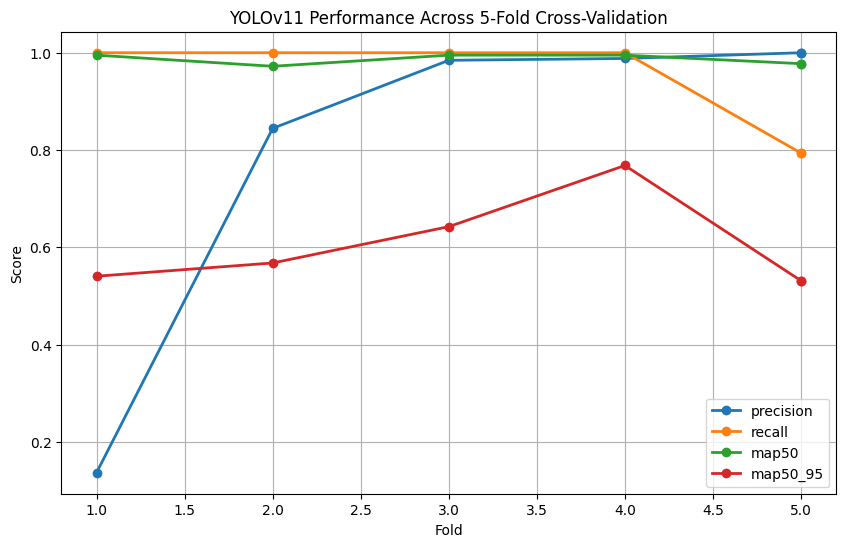

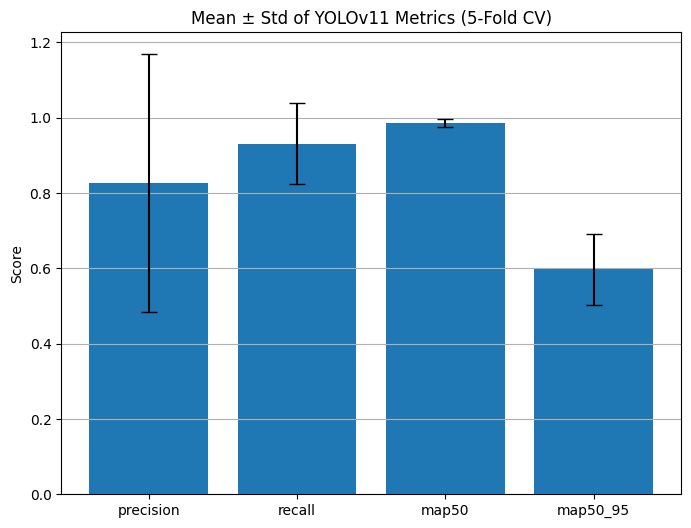

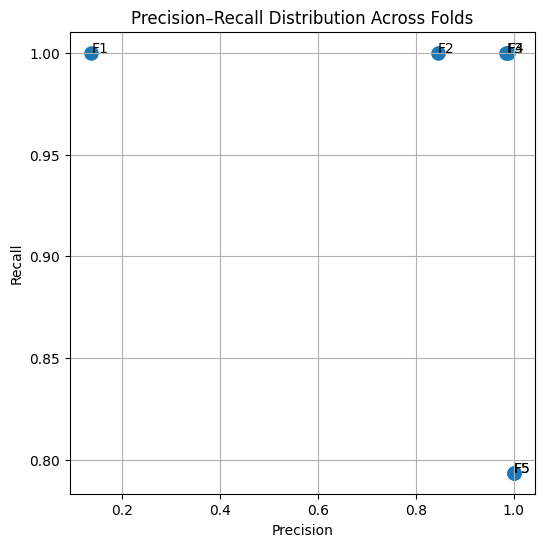

Saved mean ± std summary to /content/kfold_summary_mean_std.csv


In [26]:
# ============================
# YOLOv11 K-FOLD RESULTS GRAPHS (ONE CELL)
# ============================

import pandas as pd
import matplotlib.pyplot as plt

# Load results
CSV_PATH = "/content/kfold_results.csv"
df = pd.read_csv(CSV_PATH)

print("Loaded K-Fold Results:")
display(df)

# ============================
# 1. Metric vs Fold Line Plot
# ============================

metrics = ["precision", "recall", "map50", "map50_95"]

plt.figure(figsize=(10,6))
for m in metrics:
    plt.plot(df["fold"], df[m], marker="o", linewidth=2, label=m)

plt.xlabel("Fold")
plt.ylabel("Score")
plt.title("YOLOv11 Performance Across 5-Fold Cross-Validation")
plt.legend()
plt.grid(True)
plt.show()

# ============================
# 2. Mean ± Std Bar Chart
# ============================

summary = df.drop(columns=["fold"]).agg(["mean", "std"])
means = summary.loc["mean"]
stds = summary.loc["std"]

plt.figure(figsize=(8,6))
plt.bar(means.index, means.values, yerr=stds.values, capsize=6)
plt.ylabel("Score")
plt.title("Mean ± Std of YOLOv11 Metrics (5-Fold CV)")
plt.grid(axis="y")
plt.show()

# ============================
# 3. Precision vs Recall Scatter
# ============================

plt.figure(figsize=(6,6))
plt.scatter(df["precision"], df["recall"], s=90)

for i, fold in enumerate(df["fold"]):
    plt.text(df["precision"][i], df["recall"][i], f"F{fold}", fontsize=10)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision–Recall Distribution Across Folds")
plt.grid(True)
plt.show()

# ============================
# 4. Save Summary for Paper
# ============================

summary.to_csv("/content/kfold_summary_mean_std.csv")
print("Saved mean ± std summary to /content/kfold_summary_mean_std.csv")


In [28]:
# ============================
# YOLOv11 RESULTS — TEXT OUTPUT ONLY (ONE CELL)
# ============================

import os
import pandas as pd
import numpy as np

CSV_PATH = "/content/kfold_results.csv"
RUNS_DIR = "/content/runs/detect"

# Load K-Fold metrics
df = pd.read_csv(CSV_PATH)

# Compute mean ± std
mean_vals = df.drop(columns=["fold"]).mean()
std_vals = df.drop(columns=["fold"]).std()

print("\n==============================")
print("YOLOv11 DETECTION RESULTS")
print("5-Fold Cross-Validation")
print("==============================\n")

print(f"Precision      : {mean_vals['precision']:.4f} ± {std_vals['precision']:.4f}")
print(f"Recall         : {mean_vals['recall']:.4f} ± {std_vals['recall']:.4f}")
print(f"mAP@0.5        : {mean_vals['map50']:.4f} ± {std_vals['map50']:.4f}")
print(f"mAP@0.5:0.95   : {mean_vals['map50_95']:.4f} ± {std_vals['map50_95']:.4f}")

print("\n------------------------------")
print("QUALITATIVE OUTPUT FILES")
print("------------------------------")

# List PR curves and confusion matrices from each fold
for d in sorted(os.listdir(RUNS_DIR)):
    fold_path = os.path.join(RUNS_DIR, d)
    if os.path.isdir(fold_path):
        pr_curve = os.path.join(fold_path, "pr_curve.png")
        conf_mat = os.path.join(fold_path, "confusion_matrix.png")

        if os.path.exists(pr_curve) or os.path.exists(conf_mat):
            print(f"\n{d}:")
            if os.path.exists(pr_curve):
                print(f"  PR Curve         : {pr_curve}")
            if os.path.exists(conf_mat):
                print(f"  Confusion Matrix : {conf_mat}")

print("\n------------------------------")
print("NOTES FOR PAPER")
print("------------------------------")
print(
    "• Metrics are reported as mean ± standard deviation across 5 folds.\n"
    "• PR curves illustrate the precision–recall trade-off at varying confidence thresholds.\n"
    "• Confusion matrices summarize true positives, false positives, and false negatives.\n"
    "• Due to limited dataset size (46 images), cross-validation and strong augmentation were applied."
)
# ============================
# YOLOv11 RESULTS — TEXT OUTPUT ONLY (ONE CELL)
# ============================

import os
import pandas as pd
import numpy as np

CSV_PATH = "/content/kfold_results.csv"
RUNS_DIR = "/content/runs/detect"

# Load K-Fold metrics
df = pd.read_csv(CSV_PATH)

# Compute mean ± std
mean_vals = df.drop(columns=["fold"]).mean()
std_vals = df.drop(columns=["fold"]).std()

print("\n==============================")
print("YOLOv11 DETECTION RESULTS")
print("5-Fold Cross-Validation")
print("==============================\n")

print(f"Precision      : {mean_vals['precision']:.4f} ± {std_vals['precision']:.4f}")
print(f"Recall         : {mean_vals['recall']:.4f} ± {std_vals['recall']:.4f}")
print(f"mAP@0.5        : {mean_vals['map50']:.4f} ± {std_vals['map50']:.4f}")
print(f"mAP@0.5:0.95   : {mean_vals['map50_95']:.4f} ± {std_vals['map50_95']:.4f}")

print("\n------------------------------")
print("QUALITATIVE OUTPUT FILES")
print("------------------------------")

# List PR curves and confusion matrices from each fold
for d in sorted(os.listdir(RUNS_DIR)):
    fold_path = os.path.join(RUNS_DIR, d)
    if os.path.isdir(fold_path):
        pr_curve = os.path.join(fold_path, "pr_curve.png")
        conf_mat = os.path.join(fold_path, "confusion_matrix.png")

        if os.path.exists(pr_curve) or os.path.exists(conf_mat):
            print(f"\n{d}:")
            if os.path.exists(pr_curve):
                print(f"  PR Curve         : {pr_curve}")
            if os.path.exists(conf_mat):
                print(f"  Confusion Matrix : {conf_mat}")

print("\n------------------------------")
print("NOTES FOR PAPER")
print("------------------------------")
print(
    "• Metrics are reported as mean ± standard deviation across 5 folds.\n"
    "• PR curves illustrate the precision–recall trade-off at varying confidence thresholds.\n"
    "• Confusion matrices summarize true positives, false positives, and false negatives.\n"
    "• Due to limited dataset size (46 images), cross-validation and strong augmentation were applied."
)



YOLOv11 DETECTION RESULTS
5-Fold Cross-Validation

Precision      : 0.8256 ± 0.3428
Recall         : 0.9312 ± 0.1065
mAP@0.5        : 0.9854 ± 0.0107
mAP@0.5:0.95   : 0.5970 ± 0.0938

------------------------------
QUALITATIVE OUTPUT FILES
------------------------------

YOLOv11_Fold1:
  Confusion Matrix : /content/runs/detect/YOLOv11_Fold1/confusion_matrix.png

YOLOv11_Fold12:
  Confusion Matrix : /content/runs/detect/YOLOv11_Fold12/confusion_matrix.png

YOLOv11_Fold2:
  Confusion Matrix : /content/runs/detect/YOLOv11_Fold2/confusion_matrix.png

YOLOv11_Fold22:
  Confusion Matrix : /content/runs/detect/YOLOv11_Fold22/confusion_matrix.png

YOLOv11_Fold3:
  Confusion Matrix : /content/runs/detect/YOLOv11_Fold3/confusion_matrix.png

YOLOv11_Fold32:
  Confusion Matrix : /content/runs/detect/YOLOv11_Fold32/confusion_matrix.png

YOLOv11_Fold4:
  Confusion Matrix : /content/runs/detect/YOLOv11_Fold4/confusion_matrix.png

YOLOv11_Fold42:
  Confusion Matrix : /content/runs/detect/YOLOv11_Fold

In [31]:
import os
from ultralytics import YOLO
from google.colab import files
from IPython.display import Image, display
from IPython.display import clear_output

# Define the path to your best trained model weights
MODEL_PATH = "/content/runs/detect/YOLOv11_Fold1/weights/best.pt"

# Load the YOLO model
model = YOLO(MODEL_PATH)

# --- Step 1: Upload Image ---
print("Please upload an image for detection:")

uploaded = files.upload()

# Clear previous output for a cleaner display
clear_output()

if uploaded:
    # Get the filename of the uploaded image
    uploaded_filename = list(uploaded.keys())[0]
    print(f"Uploaded image: {uploaded_filename}")

    # --- Step 2: Perform Detection ---
    # Run inference on the uploaded image
    results = model.predict(source=uploaded_filename, imgsz=640, conf=0.25, iou=0.7,
                            save=True, # Save results to 'runs/detect/predict' directory
                            show=False # Don't show in new window, we will display it below
                           )

    # Get the path to the saved detected image
    # The results are typically saved in runs/detect/predictX where X is an incrementing number
    # We need to find the latest predict folder.
    detect_dir = os.path.join(model.predictor.save_dir, 'predict') # Assuming default save path

    # Find the output path (YOLO creates a new folder for each prediction run)
    # The structure is usually runs/detect/name_of_run/image_name.jpg
    # For predict, it often uses 'predict' then increments it if it exists (predict, predict2, etc.)
    # For this simple case, we'll assume the most recent 'predict' or 'predictX' folder

    # Get the latest run directory
    runs_dir = os.path.dirname(model.predictor.save_dir)
    latest_run_dir = sorted([d for d in os.listdir(runs_dir) if os.path.isdir(os.path.join(runs_dir, d)) and d.startswith('YOLOv11_Fold')], key=lambda x: os.path.getmtime(os.path.join(runs_dir, x)), reverse=True)[0] + '2'
    latest_predict_dir = os.path.join(runs_dir, latest_run_dir)

    # Assuming the image is saved directly with the original name
    output_image_path = os.path.join(latest_predict_dir, uploaded_filename)

    print("\nDetection Results:")
    if os.path.exists(output_image_path):
        display(Image(filename=output_image_path, width=600))
        print(f"Results saved to: {latest_predict_dir}")
    else:
        print("Could not find the output image. Please check the 'runs/detect' directory.")
        print(f"Attempted path: {output_image_path}")
        print(f"Contents of {latest_predict_dir}: {os.listdir(latest_predict_dir) if os.path.exists(latest_predict_dir) else 'Directory not found'}")

else:
    print("No image uploaded.")

Uploaded image: PXL_20250430_101959369.jpg

image 1/1 /content/PXL_20250430_101959369.jpg: 640x512 (no detections), 8.7ms
Speed: 3.1ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 512)
Results saved to /content/runs/detect/predict4

Detection Results:
Could not find the output image. Please check the 'runs/detect' directory.
Attempted path: /content/runs/detect/YOLOv11_Fold522/PXL_20250430_101959369.jpg
Contents of /content/runs/detect/YOLOv11_Fold522: Directory not found


Upload an image for detection:


Saving PXL_20250430_102334652.jpg to PXL_20250430_102334652.jpg
Uploaded image: PXL_20250430_102334652.jpg

image 1/1 /content/PXL_20250430_102334652.jpg: 512x640 1 bird, 1 teddy bear, 75.5ms
Speed: 4.2ms preprocess, 75.5ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)
Results saved to /content/runs/detect/manual_predict
Detected image found at: /content/runs/detect/manual_predict/PXL_20250430_102334652.jpg


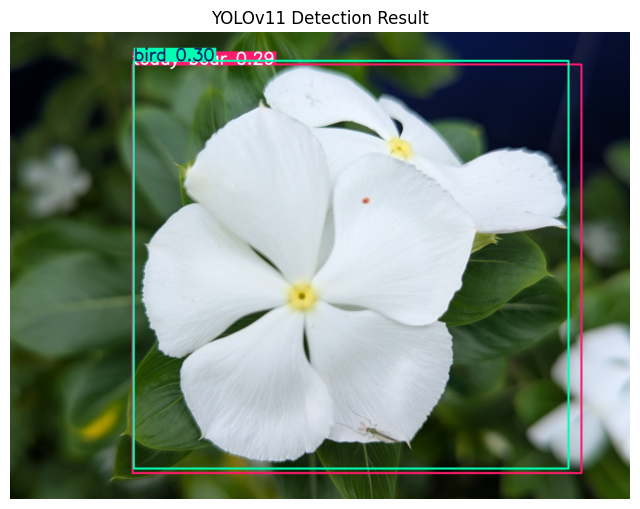

In [32]:
# ============================
# MANUAL IMAGE UPLOAD & YOLOv11 DETECTION (FIXED)
# ============================

from ultralytics import YOLO
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import os
import glob

# ----------------------------
# 1. Upload image
# ----------------------------
print("Upload an image for detection:")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

print(f"Uploaded image: {image_path}")

# ----------------------------
# 2. Load YOLOv11 model
# ----------------------------
MODEL_PATH = "/content/yolo11n.pt"   # or best.pt
model = YOLO(MODEL_PATH)

# ----------------------------
# 3. Run detection
# ----------------------------
results = model.predict(
    source=image_path,
    conf=0.25,
    iou=0.5,
    save=True,
    project="/content/runs/detect",
    name="manual_predict",
    exist_ok=True
)

# ----------------------------
# 4. Find saved detection image (SAFE METHOD)
# ----------------------------
save_dir = results[0].save_dir
detected_images = glob.glob(os.path.join(save_dir, "*"))

if len(detected_images) == 0:
    raise FileNotFoundError("No detected image was saved.")

detected_image_path = detected_images[0]
print(f"Detected image found at: {detected_image_path}")

# ----------------------------
# 5. Display detected image
# ----------------------------
img = cv2.imread(detected_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv11 Detection Result")
plt.show()


Upload up to 5 images for detection:


Saving c42cde9b-PXL_20250430_104136059.jpg to c42cde9b-PXL_20250430_104136059.jpg
Saving c96f614a-PXL_20250430_103918758.jpg to c96f614a-PXL_20250430_103918758.jpg
Saving c861cfbe-PXL_20250430_104054575.jpg to c861cfbe-PXL_20250430_104054575.jpg
Saving cc2baed8-PXL_20250430_104304177.jpg to cc2baed8-PXL_20250430_104304177.jpg
Saving cc650614-PXL_20250430_104107475.jpg to cc650614-PXL_20250430_104107475.jpg

Images selected (5):
 - c42cde9b-PXL_20250430_104136059.jpg
 - c96f614a-PXL_20250430_103918758.jpg
 - c861cfbe-PXL_20250430_104054575.jpg
 - cc2baed8-PXL_20250430_104304177.jpg
 - cc650614-PXL_20250430_104107475.jpg

0: 640x640 (no detections), 11.0ms
1: 640x640 (no detections), 11.0ms
2: 640x640 1 potted plant, 11.0ms
3: 640x640 1 potted plant, 11.0ms
4: 640x640 (no detections), 11.0ms
Speed: 3.6ms preprocess, 11.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/manual_predict_multi

Results saved to: /content/runs/detect/man

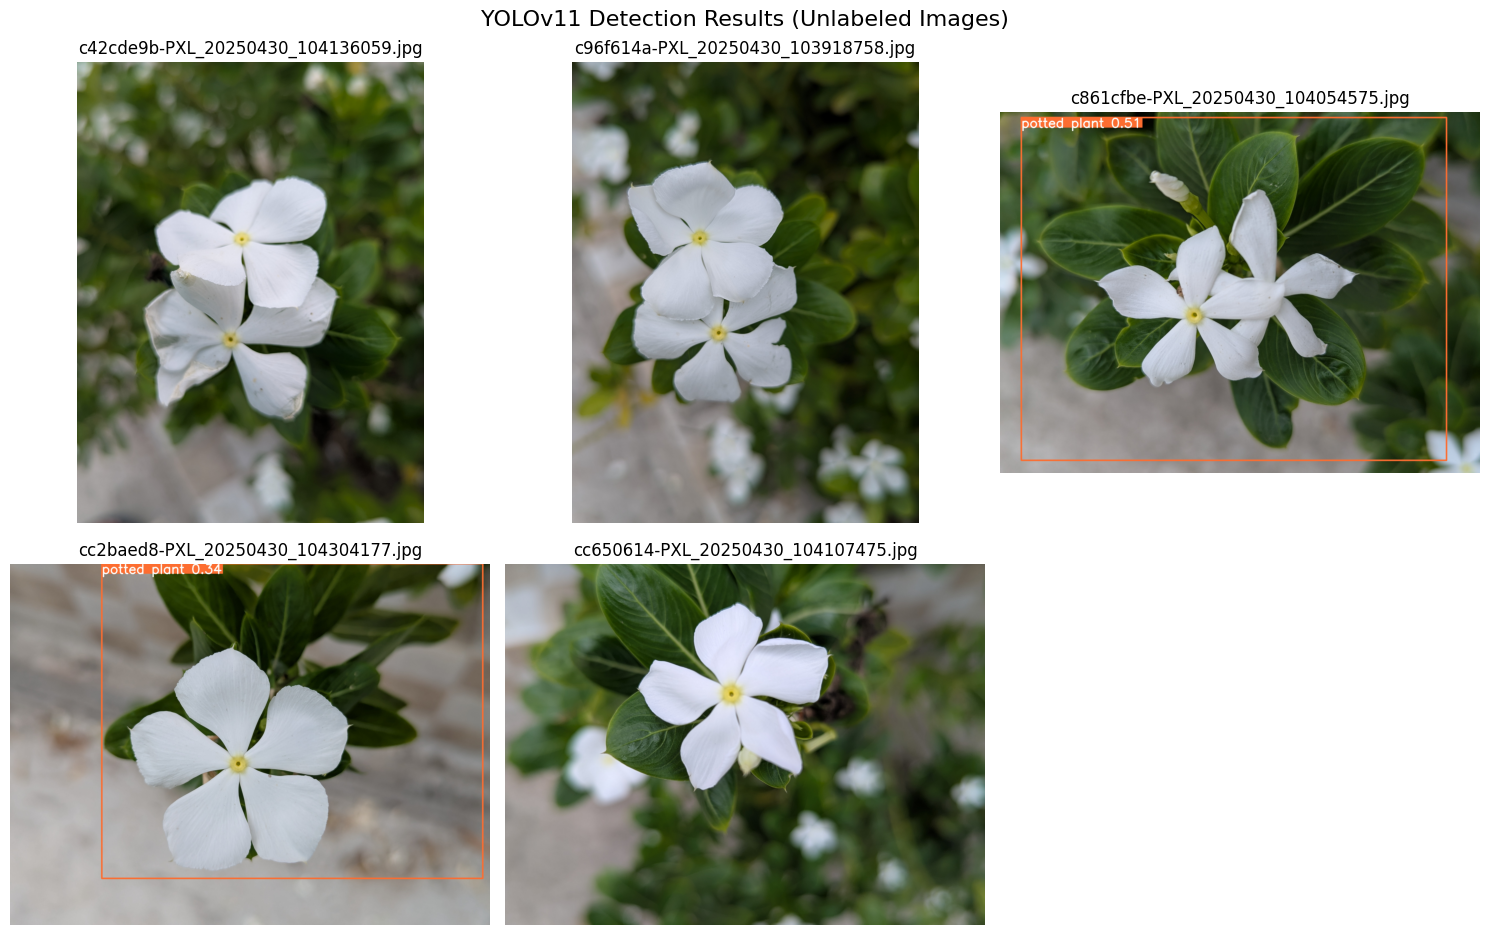

⚠ No detections in image 1: c42cde9b-PXL_20250430_104136059.jpg
⚠ No detections in image 2: c96f614a-PXL_20250430_103918758.jpg
⚠ No detections in image 5: cc650614-PXL_20250430_104107475.jpg


In [38]:
# ============================
# MULTI-IMAGE UPLOAD & YOLOv11 DETECTION (UP TO 5 IMAGES)
# ============================

from ultralytics import YOLO
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import os
import glob

# ----------------------------
# 1. Upload images (max 5)
# ----------------------------
print("Upload up to 5 images for detection:")
uploaded = files.upload()

image_paths = list(uploaded.keys())[:5]  # limit to 5 images
print(f"\nImages selected ({len(image_paths)}):")
for p in image_paths:
    print(" -", p)

# ----------------------------
# 2. Load YOLOv11 model
# ----------------------------
MODEL_PATH = "/content/yolo11n.pt"  # or best.pt
model = YOLO(MODEL_PATH)

# ----------------------------
# 3. Run detection on all images
# ----------------------------
results = model.predict(
    source=image_paths,
    conf=0.25,
    iou=0.5,
    save=True,
    project="/content/runs/detect",
    name="manual_predict_multi",
    exist_ok=True
)

save_dir = results[0].save_dir
print(f"\nResults saved to: {save_dir}")

# ----------------------------
# 4. Collect saved output images
# ----------------------------
output_images = sorted(
    glob.glob(os.path.join(save_dir, "*.jpg")),
    key=os.path.getmtime
)

# ----------------------------
# 5. Display results in grid
# ----------------------------
n = len(output_images)
cols = min(3, n)
rows = (n + cols - 1) // cols

plt.figure(figsize=(5 * cols, 5 * rows))

for i, img_path in enumerate(output_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(os.path.basename(img_path))
    plt.axis("off")

plt.suptitle("YOLOv11 Detection Results (Unlabeled Images)", fontsize=16)
plt.tight_layout()
plt.show()

# ----------------------------
# 6. Inform if no detections occurred
# ----------------------------
for i, r in enumerate(results):
    if len(r.boxes) == 0:
        print(f"⚠ No detections in image {i+1}: {image_paths[i]}")


Upload up to 5 images for detection:


Saving PXL_20250430_102244647.jpg to PXL_20250430_102244647.jpg
Saving PXL_20250430_102250057.jpg to PXL_20250430_102250057.jpg
Saving PXL_20250430_102254854.jpg to PXL_20250430_102254854.jpg
Saving PXL_20250430_102259514.jpg to PXL_20250430_102259514.jpg
Saving PXL_20250430_102334652.jpg to PXL_20250430_102334652 (1).jpg

Images selected (5):
 - PXL_20250430_102244647.jpg
 - PXL_20250430_102250057.jpg
 - PXL_20250430_102254854.jpg
 - PXL_20250430_102259514.jpg
 - PXL_20250430_102334652 (1).jpg

0: 512x640 1 potted plant, 15.0ms
1: 512x640 (no detections), 15.0ms
2: 512x640 (no detections), 15.0ms
3: 512x640 1 potted plant, 15.0ms
4: 512x640 1 bird, 1 teddy bear, 15.0ms
Speed: 4.3ms preprocess, 15.0ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 640)
Results saved to /content/runs/detect/manual_predict_multi

Results saved to: /content/runs/detect/manual_predict_multi


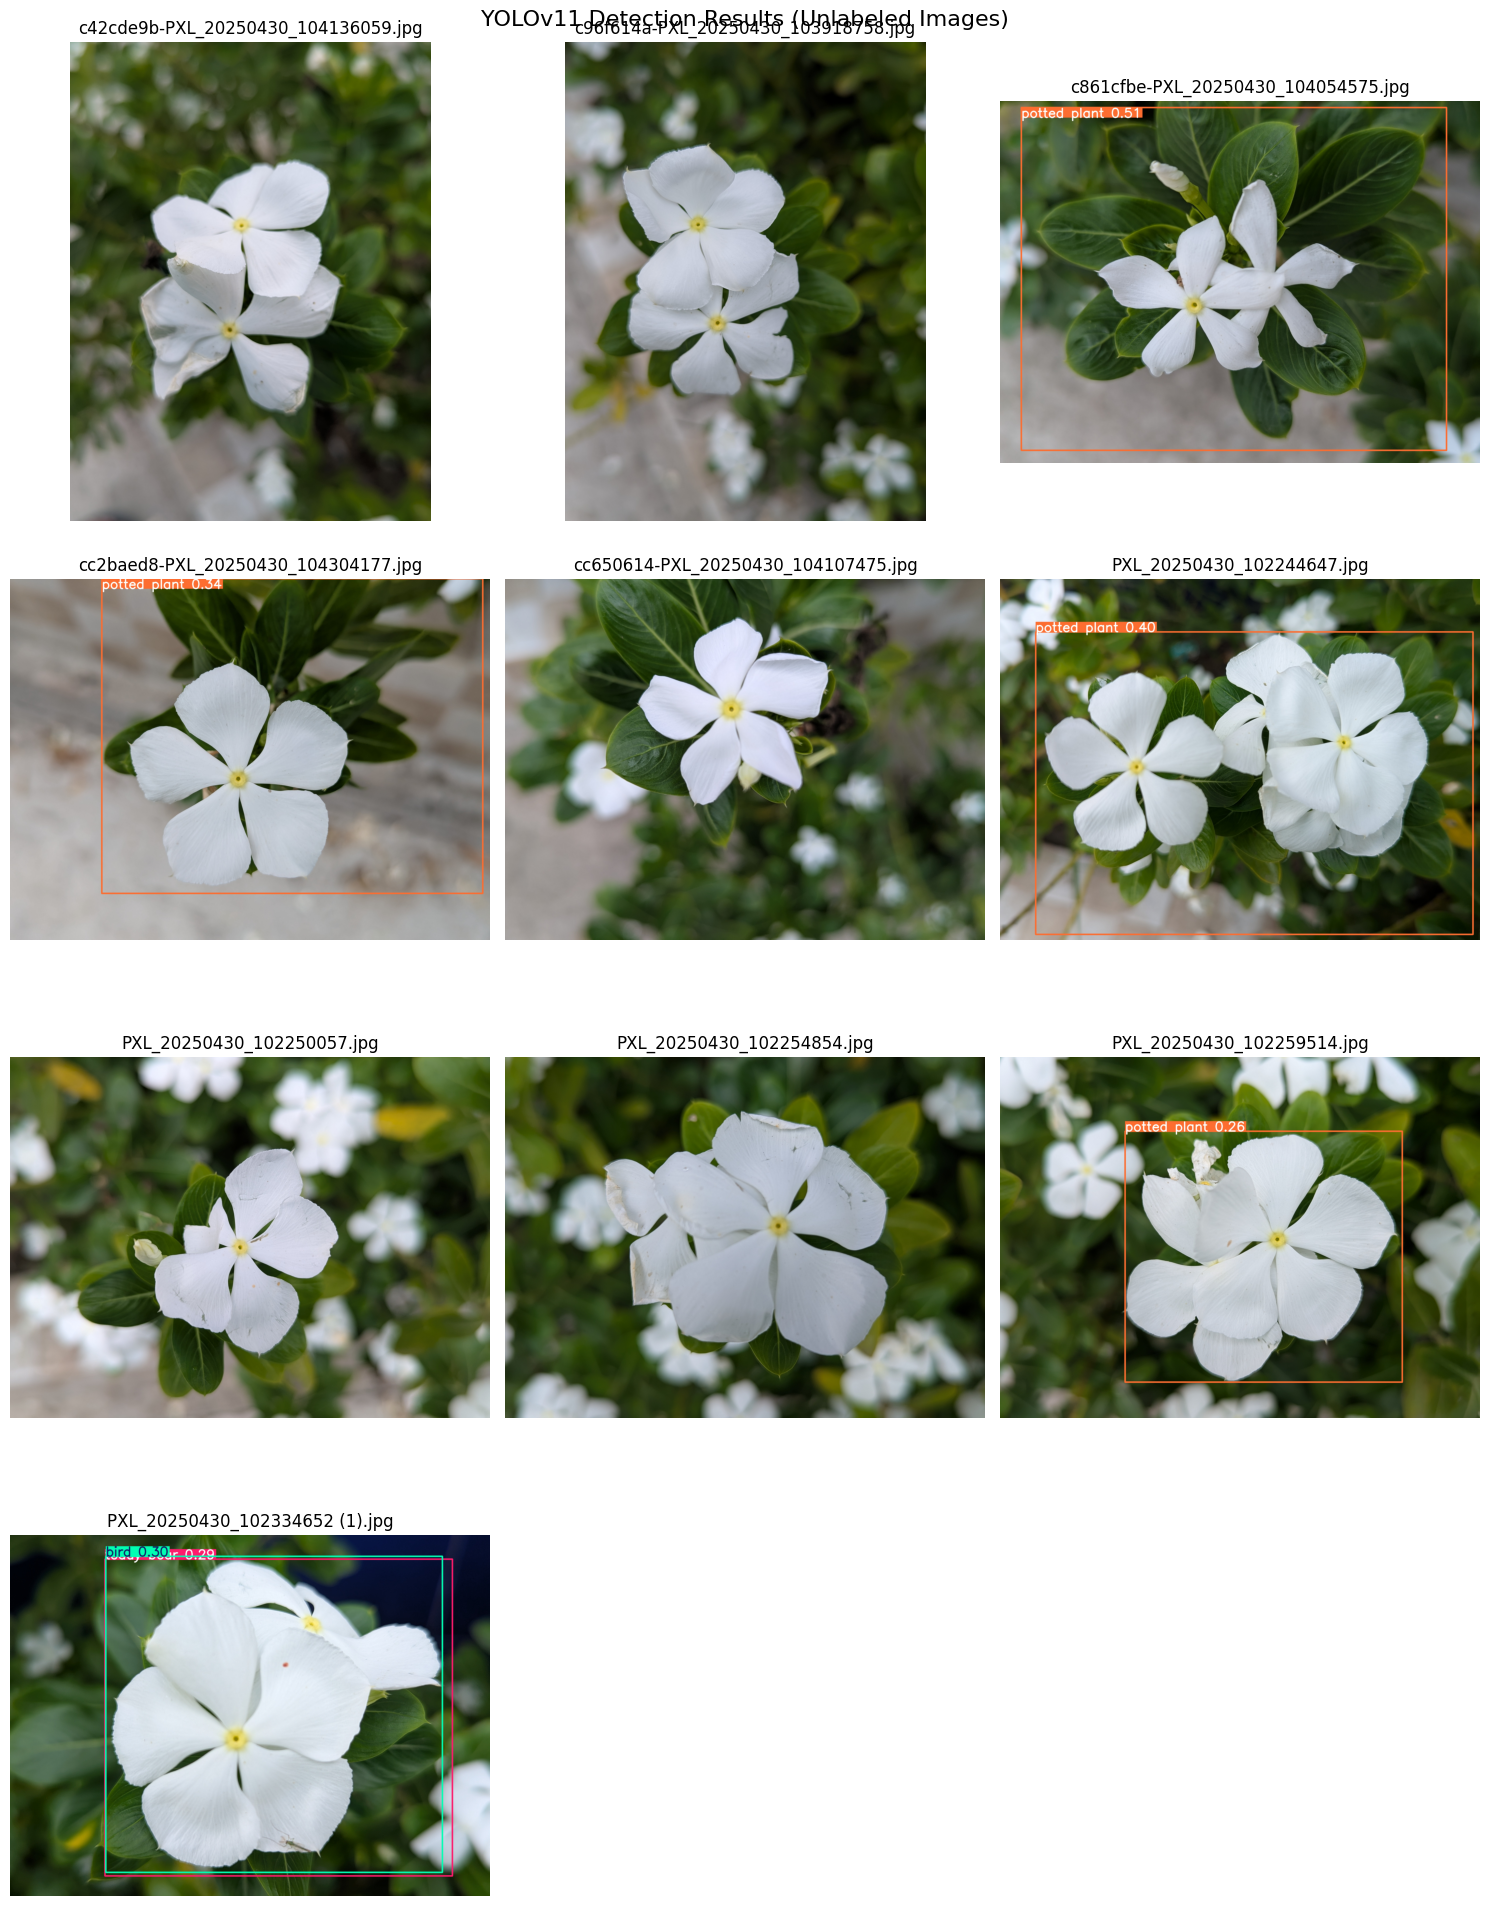

⚠ No detections in image 2: PXL_20250430_102250057.jpg
⚠ No detections in image 3: PXL_20250430_102254854.jpg


In [39]:
# ============================
# MULTI-IMAGE UPLOAD & YOLOv11 DETECTION (UP TO 5 IMAGES)
# ============================

from ultralytics import YOLO
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import os
import glob

# ----------------------------
# 1. Upload images (max 5)
# ----------------------------
print("Upload up to 5 images for detection:")
uploaded = files.upload()

image_paths = list(uploaded.keys())[:5]  # limit to 5 images
print(f"\nImages selected ({len(image_paths)}):")
for p in image_paths:
    print(" -", p)

# ----------------------------
# 2. Load YOLOv11 model
# ----------------------------
MODEL_PATH = "/content/yolo11n.pt"  # or best.pt
model = YOLO(MODEL_PATH)

# ----------------------------
# 3. Run detection on all images
# ----------------------------
results = model.predict(
    source=image_paths,
    conf=0.25,
    iou=0.5,
    save=True,
    project="/content/runs/detect",
    name="manual_predict_multi",
    exist_ok=True
)

save_dir = results[0].save_dir
print(f"\nResults saved to: {save_dir}")

# ----------------------------
# 4. Collect saved output images
# ----------------------------
output_images = sorted(
    glob.glob(os.path.join(save_dir, "*.jpg")),
    key=os.path.getmtime
)

# ----------------------------
# 5. Display results in grid
# ----------------------------
n = len(output_images)
cols = min(3, n)
rows = (n + cols - 1) // cols

plt.figure(figsize=(5 * cols, 5 * rows))

for i, img_path in enumerate(output_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(os.path.basename(img_path))
    plt.axis("off")

plt.suptitle("YOLOv11 Detection Results (Unlabeled Images)", fontsize=16)
plt.tight_layout()
plt.show()

# ----------------------------
# 6. Inform if no detections occurred
# ----------------------------
for i, r in enumerate(results):
    if len(r.boxes) == 0:
        print(f"⚠ No detections in image {i+1}: {image_paths[i]}")
